<a href="https://colab.research.google.com/github/KaelynOwen/skills-introduction-to-github/blob/main/CopyCODEXIntroduction_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Import Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import scipy as sp

# Read in the data
This can be one of two ways:

##1. Google Drive
First mount your google account so you can read data into the virtual machine
Second replace the path with your specific path
* This can be found in the folder on the side of GoogleColab after you mount your Google drive

In [5]:
# Mount your google account that has been used to share the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Let's read in the HuBMAP dataset (From Hickey et al Nature 2023)
# data_path = '/content/drive/MyDrive/Duke/Projects/PanOrgan/archived/datasets/2023_Hickey_Nature/05_25_HuBMAP_tunit.csv'
data_path = '/content/drive/MyDrive/BME590/23_09_CODEX_HuBMAP_alldata_Dryad_merged.csv'
df_HuBMAP = pd.read_csv(data_path, index_col=0)

##2. Direct Download Through Host
Get the datafiles from the online Dryad repository

In [7]:
# !wget https://datadryad.org/stash/downloads/file_stream/2572151 -O donor_metadata.csv
# !wget https://datadryad.org/stash/downloads/file_stream/2572152 -O 23_09_CODEX_HuBMAP_alldata_Dryad_merged.csv
# !wget https://datadryad.org/stash/downloads/file_stream/2572157 -O README.md

In [8]:
# df_HuBMAP = pd.read_csv('23_09_CODEX_HuBMAP_alldata_Dryad_merged.csv')

# Explore the data
Now we will do a few simple things within pandas to explore the data we have loaded in

In [9]:
# Check the dimensions of the dataset (rows x columns)
# This gives you an idea of the dataset's size
print("Dimensions of the dataset:")
print(df_HuBMAP.shape)

Dimensions of the dataset:
(2603217, 74)


In [10]:
# What columns are there for the rows?
print("Column names:")
df_HuBMAP.columns

Column names:


Index(['MUC2', 'SOX9', 'MUC1', 'CD31', 'Synapto', 'CD49f', 'CD15', 'CHGA',
       'CDX2', 'ITLN1', 'CD4', 'CD127', 'Vimentin', 'HLADR', 'CD8', 'CD11c',
       'CD44', 'CD16', 'BCL2', 'CD3', 'CD123', 'CD38', 'CD90', 'aSMA', 'CD21',
       'NKG2D', 'CD66', 'CD57', 'CD206', 'CD68', 'CD34', 'aDef5', 'CD7',
       'CD36', 'CD138', 'CD45RO', 'Cytokeratin', 'CD117', 'CD19', 'Podoplanin',
       'CD45', 'CD56', 'CD69', 'Ki67', 'CD49a', 'CD163', 'CD161', 'x', 'y',
       'array', 'Xcorr', 'Ycorr', 'Tissue_location', 'tissue', 'donor',
       'unique_region', 'region', 'OLFM4', 'FAP', 'CD25', 'CollIV', 'CK7',
       'MUC6', 'Cell Type', 'Cell Type em', 'Cell subtype', 'Neighborhood',
       'Neigh_sub', 'Neighborhood_Ind', 'NeighInd_sub', 'Community',
       'Major Community', 'Tissue Segment', 'Tissue Unit'],
      dtype='object')

# Structure of the data
The overall structure of the datasets is individual cells segmented out in each row.

## Marker columns
Columns MUC2 through CD161 are the markers used for clustering the cell types. These are the columns that are the values of the antibody staining the target protein within the tissue quantified at the single-cell level. This value is the per cell/area averaged fluorescent intensity that has subsequently been z normalized along each column as described above.

OLFM4 through MUC6 were captured in the quantification but not used within the clustering of cell types.

## Other columns are as follows:

- **x**: Tissue x position in each region imaged
- **y**: Tissue y position in each region imaged
- **array**: Tissue array from which each region was imaged
- **Xcorr**: Corrected x position in each array imaged
- **Ycorr**: Corrected y position in each array imaged
- **Tissue_location**: Segment of the intestine where the tissue came from
- **tissue**: Whether it was from the small bowel or colon
- **donor**: Which donor the cells came from
- **unique_region**: Label for the unique region from both Tissue_location and donor
- **region**: Number region from initial imaging data
- **Cell Type**: Cell type labels used for the paper analysis
- **Cell Type em**: Cell type labels from a subset of samples where MUC6 was used (B009-B012)
- **Cell subtype**: Major categories of the Cell Type column used for subsetting cell types
- **Neighborhood**: Neighborhood labels from data analyzed all together
- **Neigh_sub**: Major categories of Neighborhood column used for subsetting neighborhoods
- **Neighborhood_Ind**: Neighborhood labels from data analyzed by Tissue_location
- **NeighInd_sub**: Major categories of Neighborhood_Ind column used for subsetting neighborhoods
- **Community**: Community labels from data analyzed all together
- **Major Community**: Major categories of the Community column used for subsetting communities
- **Tissue Segment**: Tissue segment labels for each cell from data analyzed together
- **Tissue Unit**: Tissue unit labels for each cell from data analyzed together (except for two replicate conditions)


In [11]:
# Explore the first few rows of the dataset to get an overview
# This helps you understand the structure of the data
print("First few rows of the dataset:")
df_HuBMAP.head()

First few rows of the dataset:


MUC2      SOX9      MUC1      CD31   Synapto     CD49f      CD15  \
0 -0.303994 -0.163727 -0.587608 -0.212903  0.164173 -0.664863  0.049305   
1 -0.301927 -0.491706 -0.500804 -0.243205 -0.142568 -0.664861 -0.182627   
2 -0.302206 -0.547234 -0.510705 -0.235309 -0.217185 -0.622758 -0.296486   
3 -0.304219 -0.613068 -0.584499 -0.243757 -0.266696 -0.658449 -0.299027   
4 -0.294644 -0.615593 -0.570580 -0.247548 -0.042246 -0.642230 -0.299031   

       CHGA      CDX2     ITLN1  ...  Cell Type em  Cell subtype  \
0  0.003616 -0.377532 -0.450794  ...            NK        Immune   
1 -0.117573 -0.182754 -0.236199  ...            NK        Immune   
2 -0.091504 -0.268055 -0.355383  ...            NK        Immune   
3 -0.121460 -0.345381 -0.450792  ...            NK        Immune   
4 -0.121458 -0.377533 -0.450797  ...            NK        Immune   

              Neighborhood   Neigh_sub        Neighborhood_Ind  NeighInd_sub  \
0        Mature Epithelial  Epithelial       Mature Epithelial    Epithelial   
1  Transit Amplifying Zone  Epithelial       Mature Epithelial    Epithelial   
2   Innate Immune Enriched      Immune  Innate Immune Enriched        Immune   
3   Stroma & Innate Immune     Stromal  Stroma & Innate Immune       Stromal   
4           Outer Follicle      Immune          Outer Follicle        Immune   

                Community  Major Community  Tissue Segment  Tissue Unit  
0    Plasma Cell Enriched           Immune          Mucosa       Mucosa  
1       Mature Epithelial       Epithelial          Mucosa       Mucosa  
2  Innate Immune Enriched           Immune          Mucosa       Mucosa  
3                  Stroma           Stroma        Subucosa    Submucosa  
4                Follicle           Immune          Mucosa       Mucosa  

[5 rows x 74 columns]

# Graphical Interpretations
How can we use different features to understand relationships in our data and inspect what is underlying our data

First look at the different cell percentages averaged across the different regions of the intestine

In [12]:
#Need to create a unique dictionary of colors to cell types
color_list = [
    'blue', 'red', 'yellow', 'magenta', 'orange', 'green', 'brown', 'black',
    'gray', 'skyblue', 'gold', 'plum', 'yellowgreen', 'tan', 'navy', 'bisque',
    'goldenrod', 'blueviolet', 'darkorange', 'teal', 'olive', 'dimgray',
    'indigo', 'lightcoral', 'cyan', 'ivory', 'beige', 'darkblue', 'lightcyan',
    'royalblue'
]
cell_list = list(df_HuBMAP['Cell Type'].unique())
dict_cell = dict(zip(cell_list, color_list))
dict_cell

{'NK': 'blue',
 'Enterocyte': 'red',
 'MUC1+ Enterocyte': 'yellow',
 'TA': 'magenta',
 'CD66+ Enterocyte': 'orange',
 'Paneth': 'green',
 'Smooth muscle': 'brown',
 'M1 Macrophage': 'black',
 'Goblet': 'gray',
 'Neuroendocrine': 'skyblue',
 'CD57+ Enterocyte': 'gold',
 'Lymphatic': 'plum',
 'CD8+ T': 'yellowgreen',
 'DC': 'tan',
 'M2 Macrophage': 'navy',
 'B': 'bisque',
 'Neutrophil': 'goldenrod',
 'Endothelial': 'blueviolet',
 'Cycling TA': 'darkorange',
 'Plasma': 'teal',
 'CD4+ T cell': 'olive',
 'Stroma': 'dimgray',
 'Nerve': 'indigo',
 'ICC': 'lightcoral',
 'CD7+ Immune': 'cyan'}

<ipython-input-13-84859bfd2e6d>:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 3000x1800 with 0 Axes>

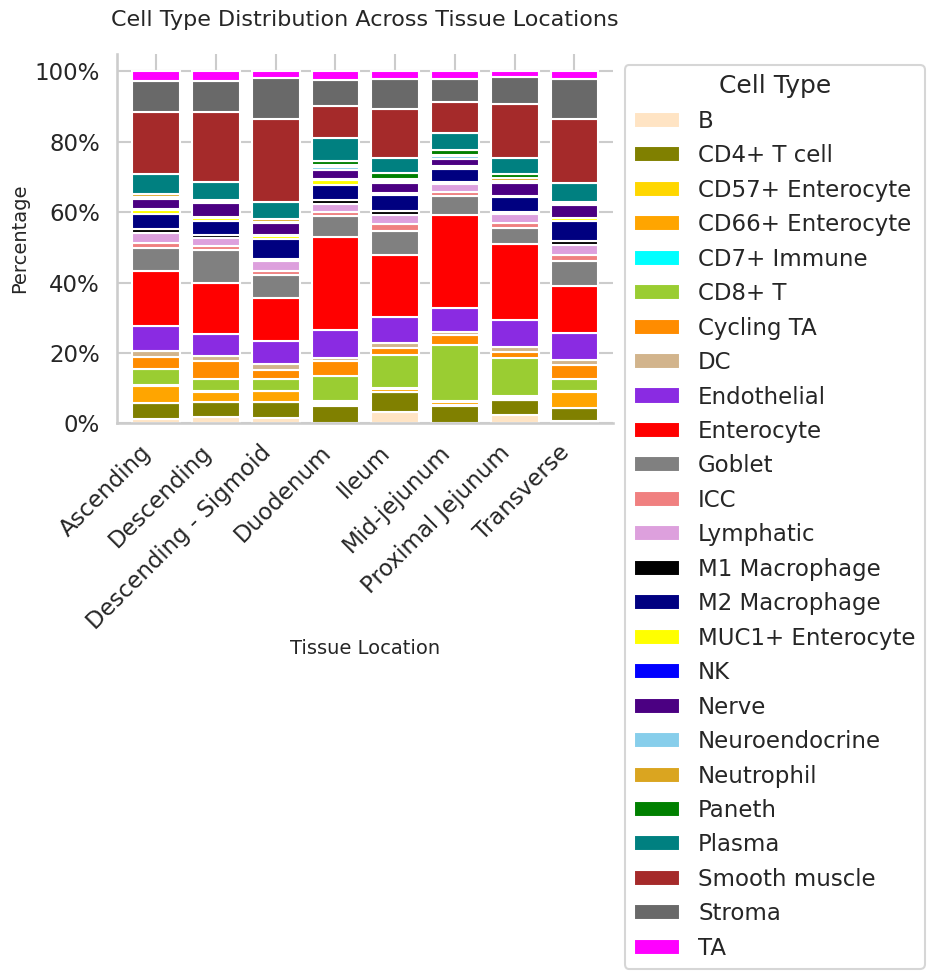

In [13]:
# Create the pivot table
pivot_df = df_HuBMAP.pivot_table(index='Tissue_location', columns='Cell Type', aggfunc='size', fill_value=0)
pivot_df_percent = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Set a professional style and context
sns.set_style("whitegrid")
sns.set_context("talk")

# Generate a colors list in the order of cell types as they appear in the pivot table columns
colors = [dict_cell[cell_type] for cell_type in pivot_df_percent.columns]

# Create the figure with higher DPI for clarity
plt.figure(figsize=(10, 6), dpi=300)

# Create the stacked bar plot using the predefined colors
ax = pivot_df_percent.plot(kind='bar', stacked=True, color=colors, width=0.8)

# Set chart title and labels
plt.title("Cell Type Distribution Across Tissue Locations", fontsize=16, pad=20)
plt.xlabel("Tissue Location", fontsize=14)
plt.ylabel("Percentage", fontsize=14)

# Format y-axis as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust legend settings. Since we used a custom color list, we can reconstruct the legend:
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, title="Cell Type", bbox_to_anchor=(1.0, 1.0), loc='upper left')

# Remove top and right spines for a cleaner look
sns.despine()

# Ensure layout is tight and well-spaced
plt.tight_layout()

# Display the plot
plt.show()


Next, let's look at ust one cell type by which tissue it comes from (small intestine vs. colon).

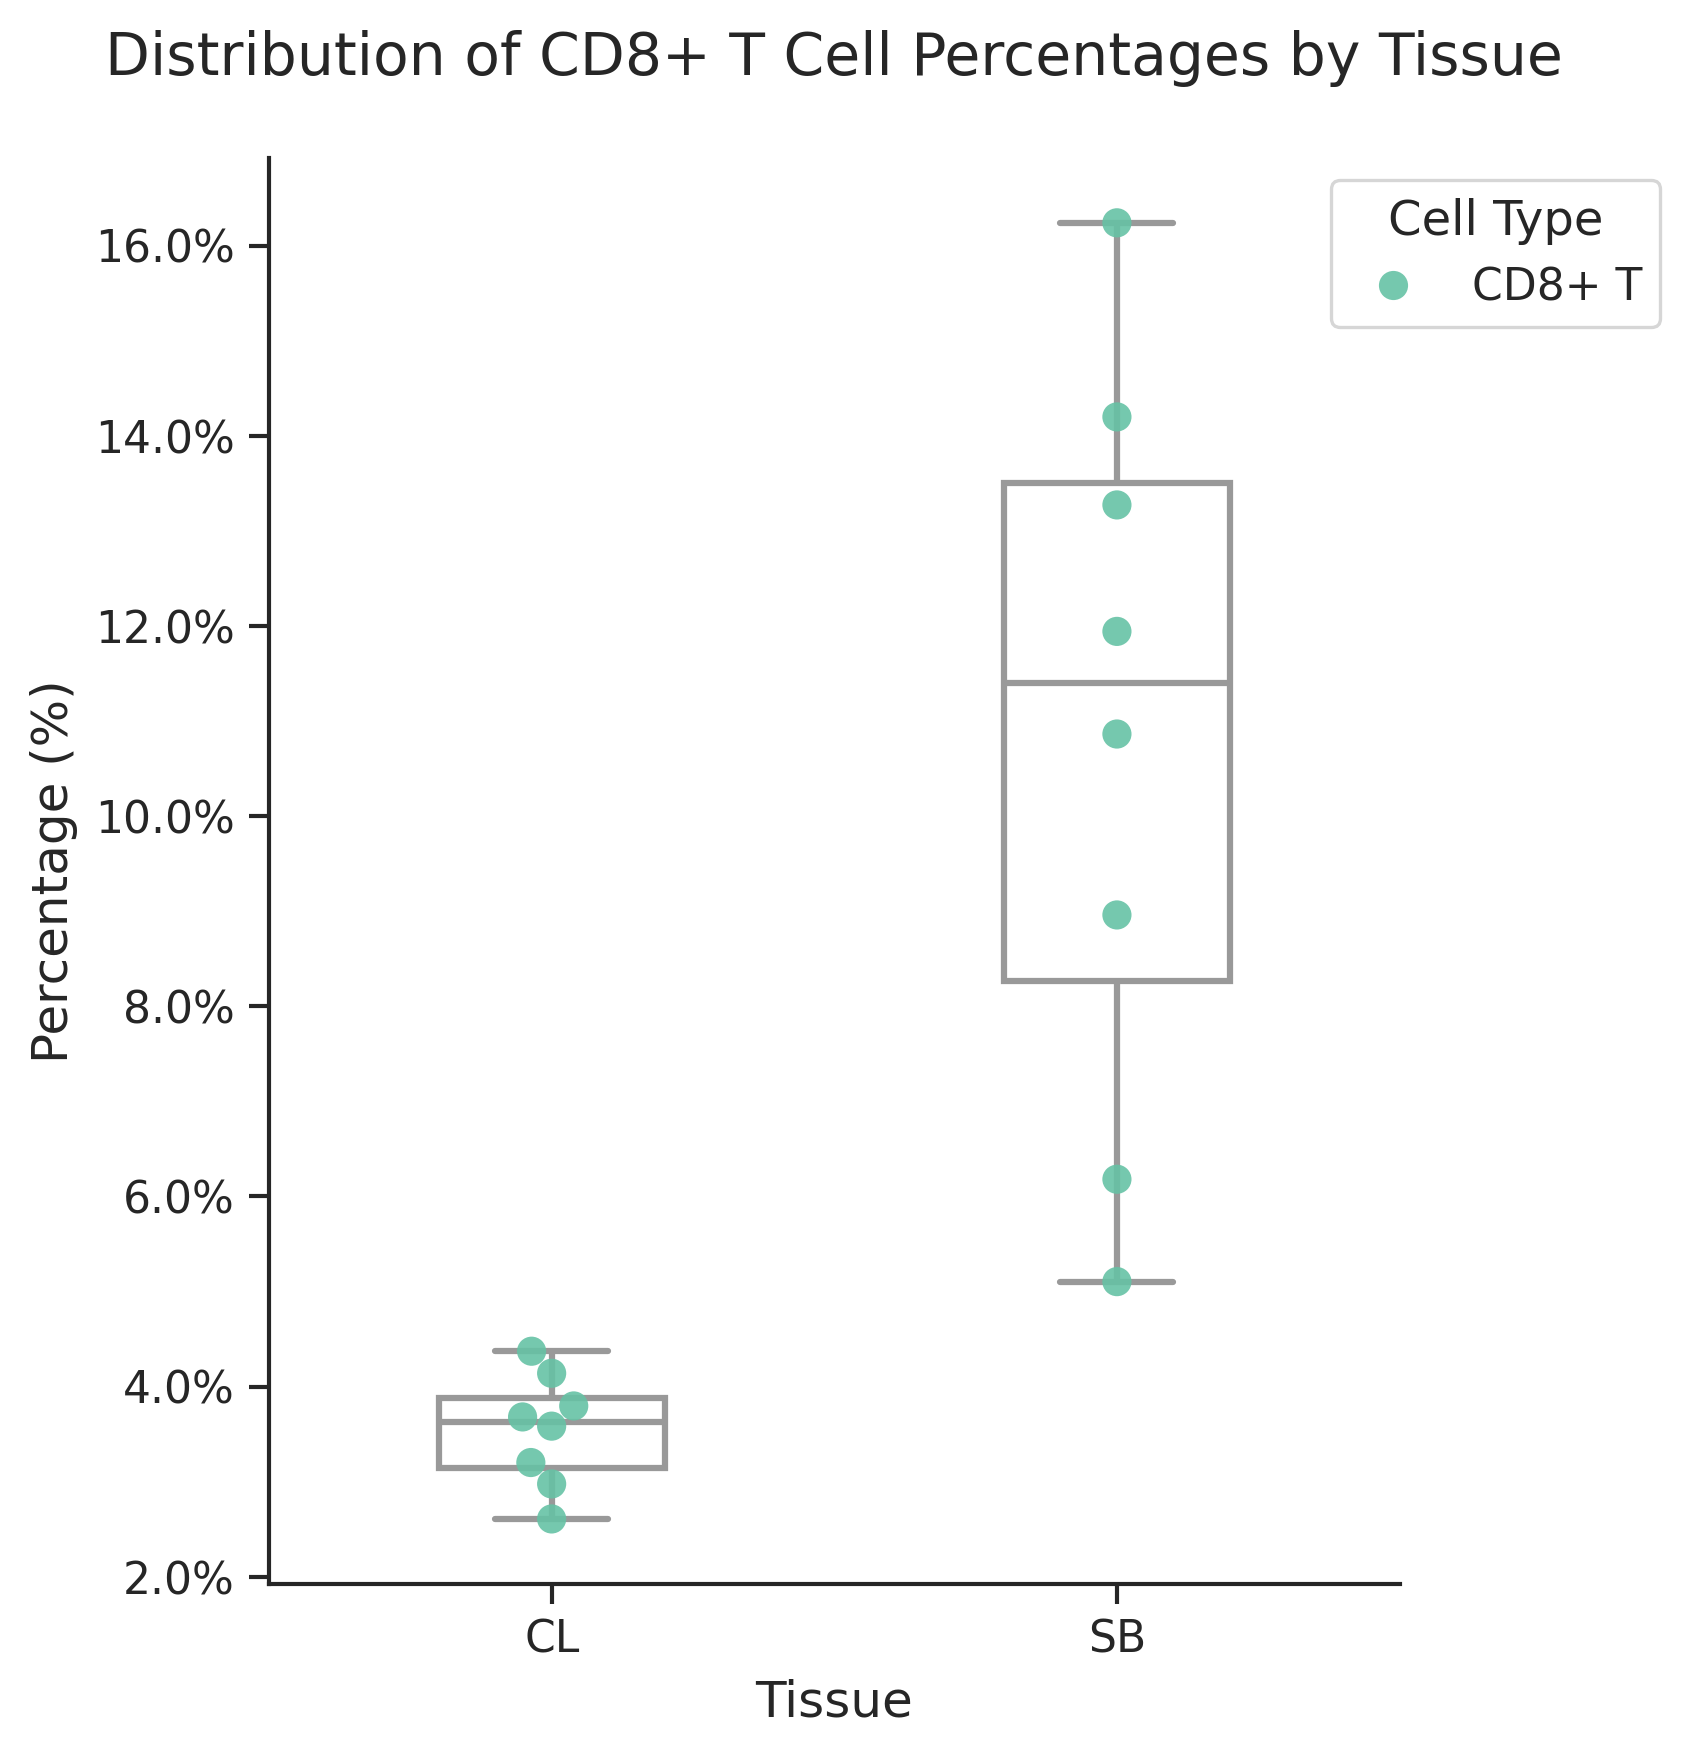

In [14]:
# Filter the dataset for Cd8+ T cells
cd8_t_cells = df_HuBMAP[df_HuBMAP['Cell Type'] == 'CD8+ T']

# Group the filtered data by tissue and cell type to calculate percentages
percentage_data = cd8_t_cells.groupby(['tissue', 'Cell Type', 'donor'])['MUC2'].count() / df_HuBMAP.groupby(['tissue', 'donor'])['MUC2'].count() * 100
percentage_data = percentage_data.reset_index(name='Percentage')

# Set style and context for a professional look
sns.set_context("paper", font_scale=1.2)
sns.set_style("ticks")

# Create the figure with a higher DPI for clarity
plt.figure(figsize=(6, 6), dpi=300)

# Create the swarm plot
sns.swarmplot(
    data=percentage_data,
    x='tissue',
    y='Percentage',
    hue='Cell Type',    # If there's only one cell type, consider removing 'hue'
    palette='Set2',     # Softer, more professional palette
    marker='o',
    size=7,
    alpha=0.9
)

# Overlay a box plot
sns.boxplot(
    data=percentage_data,
    x='tissue',
    y='Percentage',
    color='white',
    width=0.4,
    linewidth=1.5,
    showfliers=False
)

# Set title and labels with improved formatting
plt.title("Distribution of CD8+ T Cell Percentages by Tissue", fontsize=14, pad=20)
plt.xlabel("Tissue", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)

# Format y-axis as percentages
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Adjust legend placement
plt.legend(title="Cell Type", loc='upper right', bbox_to_anchor=(1.25, 1))

# Despine for a cleaner look
sns.despine()

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# Add metadata to data
There are a number of metadata associated with the dataset that can enrich our analysis

In [15]:
# We can read in the metadata associated with the HuBMAP dataset (From Hickey et al Nature 2023)
# data_path = '/content/drive/MyDrive/Research/Collaborations/HUBMAP_Personal/CODEX_data/donor_metadata.csv'
data_path = '/content/drive/MyDrive/BME590/donor_metadata.csv'
df_metadata = pd.read_csv(data_path, index_col=0)

In [16]:
# Alternatively if you downloaded from host
# df_metadata = pd.read_csv('donor_metadata.csv')

This table is relatively small so we can see the entire table after we have loaded it in

In [17]:
df_metadata

B001   B004    B005   B006   B008   B009  \
Stanford ID                                                                    
donor age                             67     78      24     38     37     30   
donor sex                         female   male  female   male   male   male   
donor race                         White  Black   White  White  White  White   
BMI                                 30.2   35.1    23.2     29   29.3   27.8   
History of diabetes                  yes    yes      no     no     no     no   
History of cancer                     no     no      no     no     no     no   
History of hypertension              yes    yes      no     no    yes     no   
History gastrointestinal disease      no     no      no     no     no     no   

                                   B010    B011   B012  
Stanford ID                                             
donor age                            37      65     24  
donor sex                          male  female   male  
donor race                        White   Black  White  
BMI                                24.6    20.5   22.9  
History of diabetes                  no     yes     no  
History of cancer                    no      no     no  
History of hypertension              no     yes     no  
History gastrointestinal disease     no      no     no

# Map metadata to Dataframe
Metadata can be mapped to the unique Stanford ID associated. This corresponds to the column `'donor'` in `df_HuBMAP`.

In [18]:
df_HuBMAP['donor'].unique()

array(['B004', 'B005', 'B006', 'B009', 'B010', 'B011', 'B012', 'B008'],
      dtype=object)

In [19]:
#Transpose the metadata and rename the column
df_metadataT = df_metadata.T.reset_index()
df_metadataT.rename(columns={'index': 'donor'}, inplace=True)

# Merge the two dataframes based on the 'donor' column
df_merged = df_HuBMAP.merge(df_metadataT, on='donor', how='left')
df_merged

MUC2      SOX9      MUC1      CD31   Synapto     CD49f      CD15  \
0       -0.303994 -0.163727 -0.587608 -0.212903  0.164173 -0.664863  0.049305   
1       -0.301927 -0.491706 -0.500804 -0.243205 -0.142568 -0.664861 -0.182627   
2       -0.302206 -0.547234 -0.510705 -0.235309 -0.217185 -0.622758 -0.296486   
3       -0.304219 -0.613068 -0.584499 -0.243757 -0.266696 -0.658449 -0.299027   
4       -0.294644 -0.615593 -0.570580 -0.247548 -0.042246 -0.642230 -0.299031   
...           ...       ...       ...       ...       ...       ...       ...   
2603212  0.351916  0.693827 -0.081489 -0.240643  0.008875  0.143445  0.373710   
2603213  0.233642  0.171892  0.141842 -0.236145 -0.097772 -0.099283  0.626185   
2603214 -0.212237 -0.280904 -0.197833 -0.245638 -0.152563 -0.125035  0.430416   
2603215 -0.328666  0.607609 -0.180362 -0.247351 -0.143742 -0.169576  1.095596   
2603216  0.015179  1.656635 -0.250193 -0.243560 -0.084982  0.061781  1.300252   

             CHGA      CDX2     ITLN1  ...  Tissue Segment  Tissue Unit  \
0        0.003616 -0.377532 -0.450794  ...          Mucosa       Mucosa   
1       -0.117573 -0.182754 -0.236199  ...          Mucosa       Mucosa   
2       -0.091504 -0.268055 -0.355383  ...          Mucosa       Mucosa   
3       -0.121460 -0.345381 -0.450792  ...        Subucosa    Submucosa   
4       -0.121458 -0.377533 -0.450797  ...          Mucosa       Mucosa   
...           ...       ...       ...  ...             ...          ...   
2603212 -0.097896  0.869830  0.579653  ...          Mucosa       Mucosa   
2603213 -0.105545  0.092076  0.682969  ...          Mucosa       Mucosa   
2603214 -0.105787 -0.038327 -0.173319  ...          Mucosa       Mucosa   
2603215 -0.113879  0.370160 -0.133272  ...          Mucosa       Mucosa   
2603216 -0.108526  1.245830 -0.063456  ...          Mucosa       Mucosa   

         donor age  donor sex  donor race   BMI  History of diabetes  \
0               78       male       Black  35.1                  yes   
1               78       male       Black  35.1                  yes   
2               78       male       Black  35.1                  yes   
3               78       male       Black  35.1                  yes   
4               78       male       Black  35.1                  yes   
...            ...        ...         ...   ...                  ...   
2603212         37       male       White  29.3                   no   
2603213         37       male       White  29.3                   no   
2603214         37       male       White  29.3                   no   
2603215         37       male       White  29.3                   no   
2603216         37       male       White  29.3                   no   

         History of cancer  History of hypertension  \
0                       no                      yes   
1                       no                      yes   
2                       no                      yes   
3                       no                      yes   
4                       no                      yes   
...                    ...                      ...   
2603212                 no                      yes   
2603213                 no                      yes   
2603214                 no                      yes   
2603215                 no                      yes   
2603216                 no                      yes   

         History gastrointestinal disease  
0                                      no  
1                                      no  
2                                      no  
3                                      no  
4                                      no  
...                                   ...  
2603212                                no  
2603213                                no  
2603214                                no  
2603215                                no  
2603216                                no  

[2603217 rows x 82 columns]

# Inspect Associations with metadata
Now we can inspect the data even further, specifically we can look at associations with cell types. We can look at some of those that we found in the paper.

In [20]:
# Filter the dataset for M1 Macrophages
M1_cells = df_merged[df_merged['Cell Type'] == 'M1 Macrophage']

# Group the filtered data by tissue and cell type to calculate percentages
percentage_data = M1_cells.groupby(['tissue', 'Cell Type','donor'])['MUC2'].count() / df_HuBMAP.groupby(['tissue','donor'])['MUC2'].count() * 100
percentage_data = percentage_data.reset_index(name='Percentage')

df_meta_cell = percentage_data.merge(df_metadataT, on='donor', how='left')

# Convert BMI to numeric
df_meta_cell['BMI'] = pd.to_numeric(df_meta_cell['BMI'], errors='coerce')

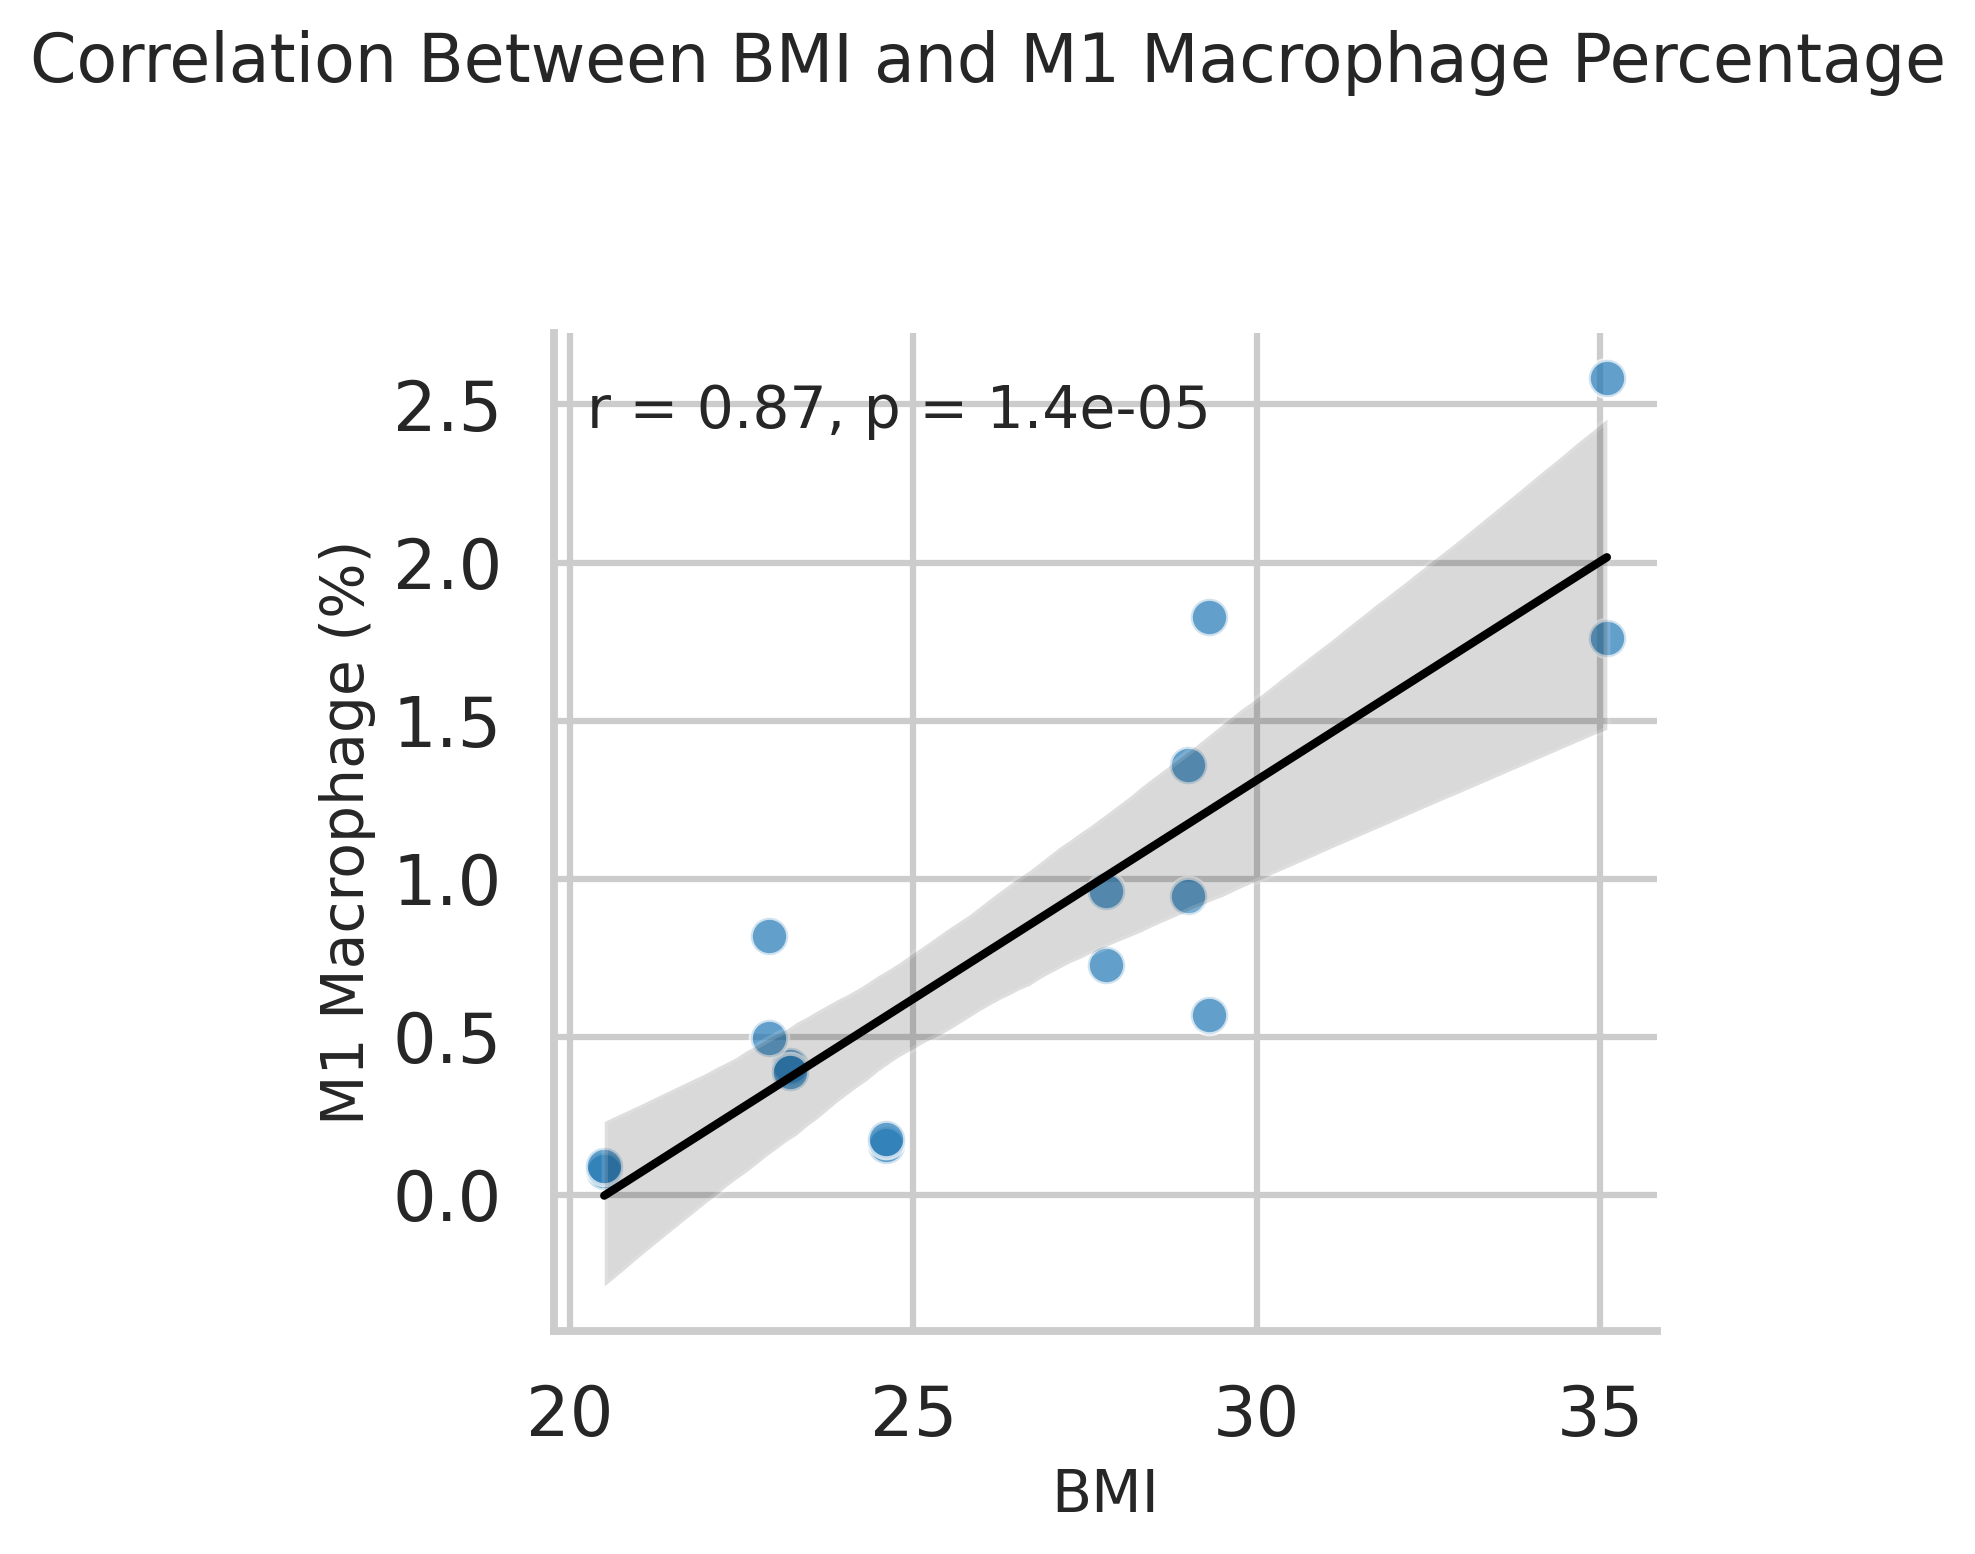

In [21]:
# Set a professional style and context
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the lmplot with improved aesthetics
g = sns.lmplot(
    x='BMI',
    y='Percentage',
    data=df_meta_cell,
    height=5,
    aspect=1,
    scatter_kws={'alpha':0.7, 'edgecolor':'white'},  # softer points with white edges
    line_kws={'color':'black', 'lw':2}               # emphasize the regression line
)

# Define a function to annotate the plot with correlation coefficient and p-value
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['BMI'], data['Percentage'])
    ax = plt.gca()
    # Position annotation in the top-left corner inside the axes
    ax.text(0.03, 0.95, f'r = {r:.2f}, p = {p:.2g}',
            transform=ax.transAxes,
            fontsize=14,
            verticalalignment='top')

# Apply the annotate function
g.map_dataframe(annotate)

# Customize the plot labels and fonts
g.set_axis_labels('BMI', 'M1 Macrophage (%)', fontsize=14)
g.set(xlim=(None, None), ylim=(None, None))  # Optionally set axis limits if needed

# Optionally add a title
g.fig.suptitle("Correlation Between BMI and M1 Macrophage Percentage", fontsize=16, y=1.05)

# Increase figure DPI for better quality
g.fig.set_dpi(300)

# Remove top and right spines for a cleaner look
sns.despine()

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

## Plot the data

Here we will plot the data spatially to see what the cell types look like within the tissue and will import two functions to plot this out

In [22]:
#Imaging function that provides a quick overview of spatial data
def catplot2(df, hue, exp='Exp', X='X', Y='Y', invert_y=False, size=3, legend=True, palette="bright", figsize=5, style='white', exps=None, axis='on', scatter_kws={}):
    '''
    Plots cells in a tissue section color-coded by either cell type or node allocation.
    df:  dataframe with cell information
    size:  size of points to plot for each cell.
    hue:  color by "Clusterid" or "Node," respectively.
    legend:  include a legend in the plot.
    '''

    # Define default scatterplot keyword arguments
    scatter_kws_ = {'s': size, 'alpha': 1}
    scatter_kws_.update(scatter_kws)

    figures = []  # A list to store plot figures
    df = df.rename(columns=lambda x: str(x))  # Rename DataFrame columns

    # Ensure the 'hue' column is treated as a categorical variable
    df[hue] = df[hue].astype("category")

    if invert_y:
        # If 'invert_y' is True, invert the Y-values
        y_orig = df[Y].values.copy()
        df[Y] *= -1

    style = {'axes.facecolor': style}
    sns.set_style(style)

    if exps is None:
        exps = list(df[exp].unique())  # Display all experiments if 'exps' is not specified
    elif not isinstance(exps, list):
        exps = [exps]  # Ensure 'exps' is a list

    for name in exps:
        data = df[df[exp] == name]  # Filter data for the specified experiment

        print(name)  # Print the name of the current experiment

        # Create a scatterplot (lmplot) using Seaborn
        f = sns.lmplot(x=X, y=Y, data=data, hue=hue,
                       legend=legend, fit_reg=False, markers='.', height=figsize, palette=palette, scatter=True, scatter_kws=scatter_kws_)

        if axis == 'off':
            # If 'axis' is 'off', remove axis lines and labels
            sns.despine(top=True, right=True, left=True, bottom=True)
            f = f.set(xticks=[], yticks=[]).set_xlabels('').set_ylabels('')

        plt.title(name)  # Set the title of the plot

        plt.show()  # Display the plot
        figures += [f]  # Add the plot figure to the list

    if invert_y:
        df[Y] = y_orig  # Restore the original Y-values if 'invert_y' was used

    return figures


In [23]:
#Imaging function that provides a high resolution overview of spatial data that is scaled appropriately
def catplot(df, hue, exp='Exp', X='X', Y='Y', invert_y=False, size=3, legend=True, palette='bright', figsize=5, style='white', exps=None, axis='on', scatter_kws={}, **kwargs):
    '''
    Plots cells in tissue section color coded by either cell type or node allocation.
    df:  dataframe with cell information
    size:  size of point to plot for each cell.
    hue:  color by "Clusterid" or "Node" respectively.
    legend:  to include legend in the plot.
    '''

    # Set default parameters for scatter plots
    scatter_kws_ = {'s': size, 'alpha': 1}
    scatter_kws_.update(scatter_kws)

    figures = []  # List to store plot figures
    df = df.rename(columns=lambda x: str(x))  # Ensure column names are strings

    df[hue] = df[hue].astype('category')  # Convert the hue column to a category
    if invert_y:
        y_orig = df[Y].values.copy()
        df[Y] *= -1

    # Set Seaborn style
    style = {'axes.facecolor': style}
    sns.set_style(style)

    if exps is None:
        exps = list(df[exp].unique())  # Display all experiments if not specified
    elif not isinstance(exps, list):
        exps = [exps]

    for name in exps:
        data = df[df[exp] == name]

        data[X] = data[X] - data[X].min()  # Normalize X coordinates
        data[Y] = data[Y] - data[Y].min()  # Normalize Y coordinates

        xrange = data[X].max() - data[X].min()
        yrange = data[Y].max() - data[Y].min()

        # Create a scatter plot using Seaborn's lmplot
        f = sns.lmplot(x=X, y=Y, data=data, hue=hue,
                       legend=legend, fit_reg=False, markers='.', height=yrange / 400, palette=palette, scatter=True, scatter_kws=scatter_kws_, aspect=xrange / yrange, **kwargs)

        if axis == 'off':
            sns.despine(top=True, right=True, left=True, bottom=True)
            f = f.set(xticks=[], yticks=[]).set_xlabels('').set_ylabels('')

        plt.title(name)  # Set the plot title
        plt.show()
        figures += [f]

    if invert_y:
        df[Y] = y_orig  # Restore the original Y values

    return figures

B010_Right


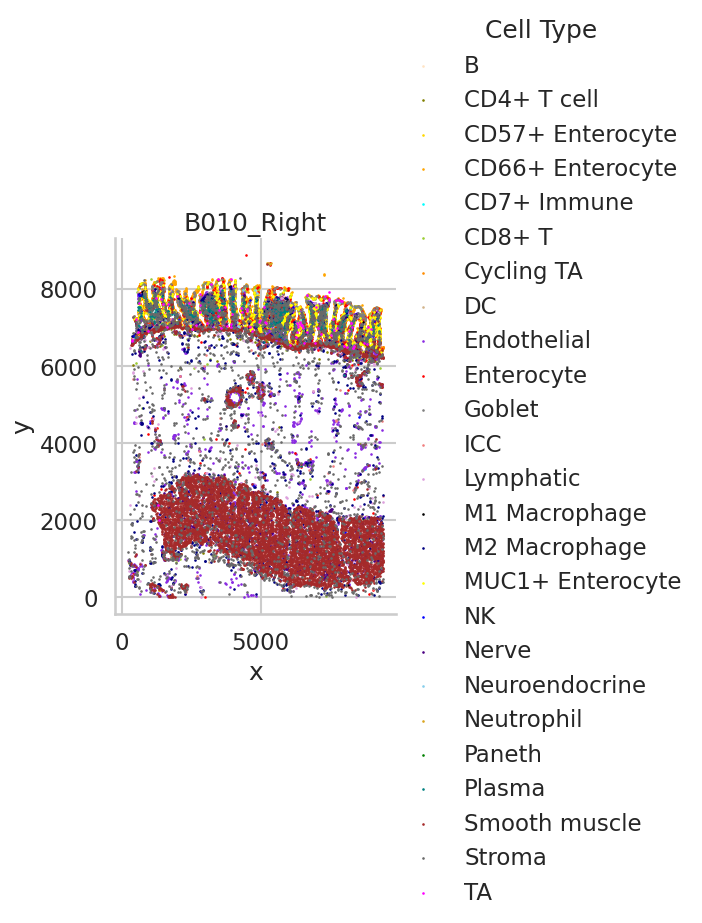

B010_Left


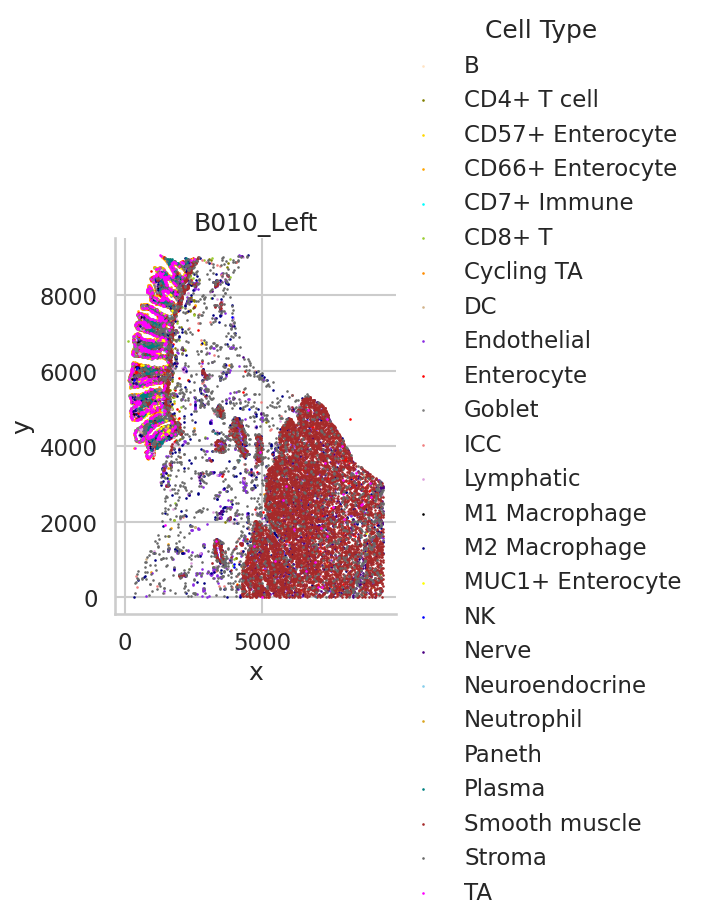

B010_Duodenum


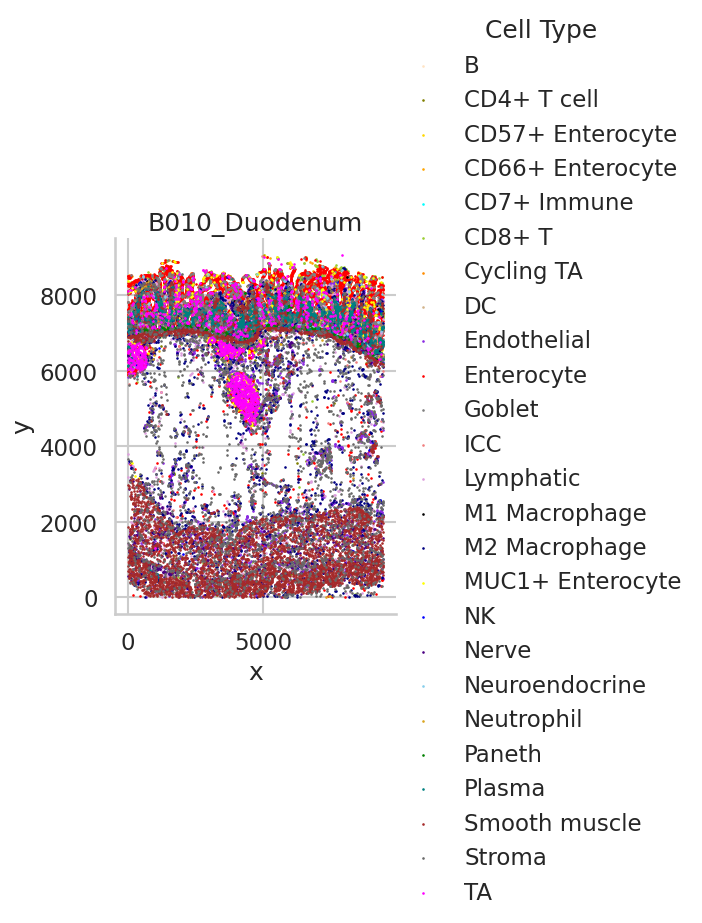

B010_Ileum


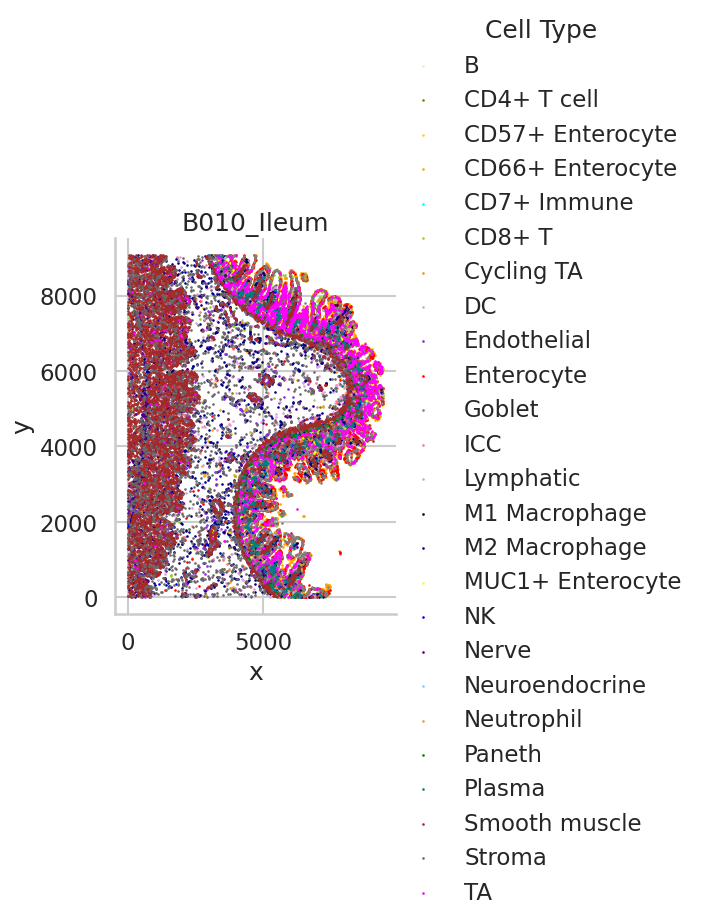

B010_Mid jejunum


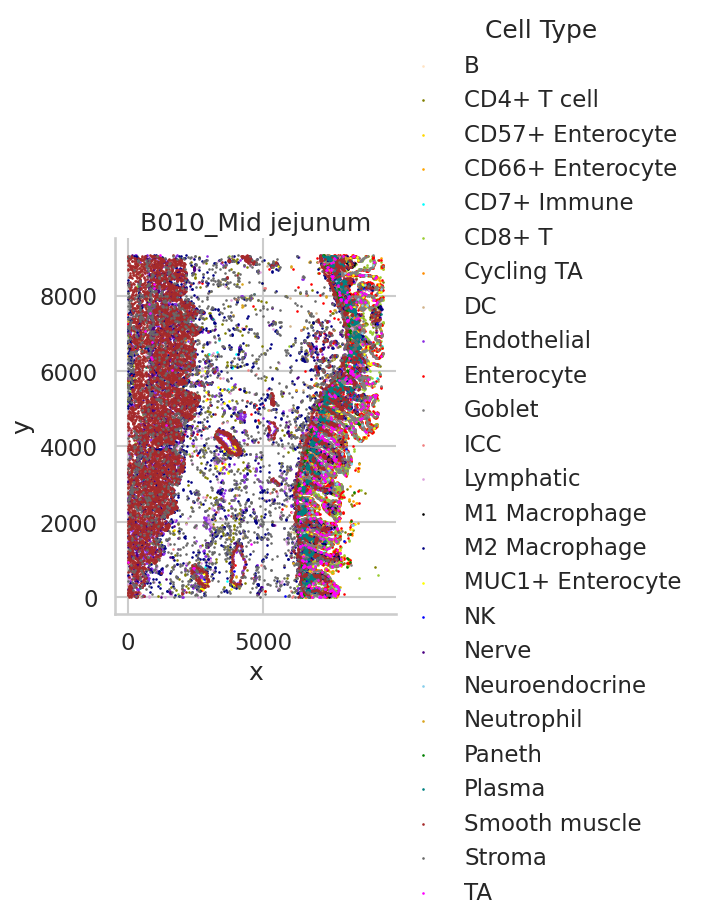

B010_Proximal jejunum


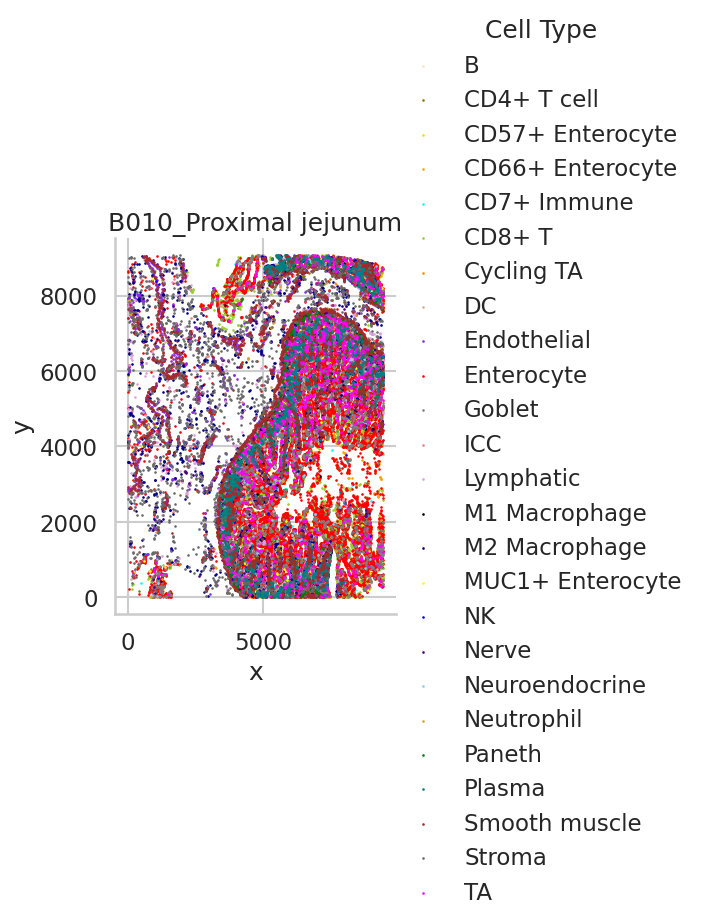

B010_Sigmoid


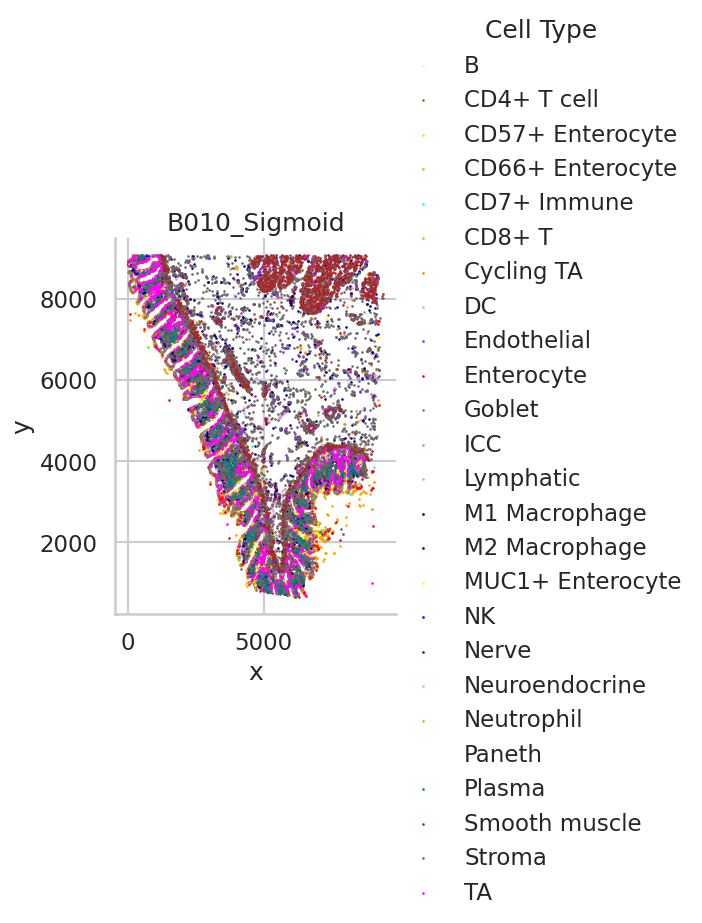

B010_Trans


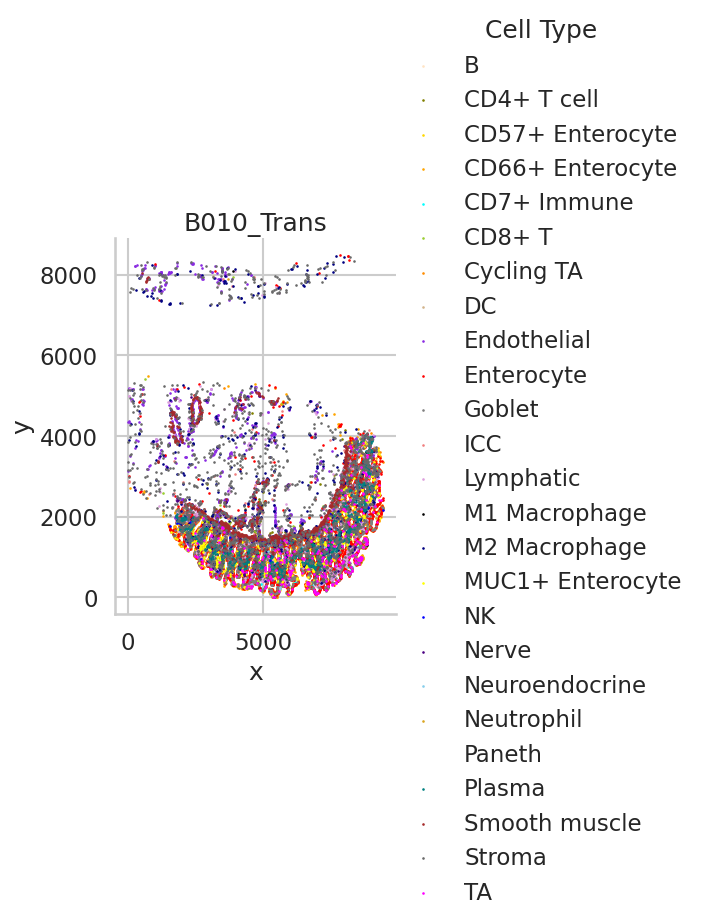

In [24]:
#Use the faster function for a quick overview of the tissues
catplot2(df = df_HuBMAP.loc[df_HuBMAP['donor']=='B010'], hue = 'Cell Type', exp='unique_region', X='x', Y='y',
        invert_y=False, size=3, legend=True, palette=dict_cell, figsize=5,
        style='white', exps=None, axis='on', scatter_kws={})

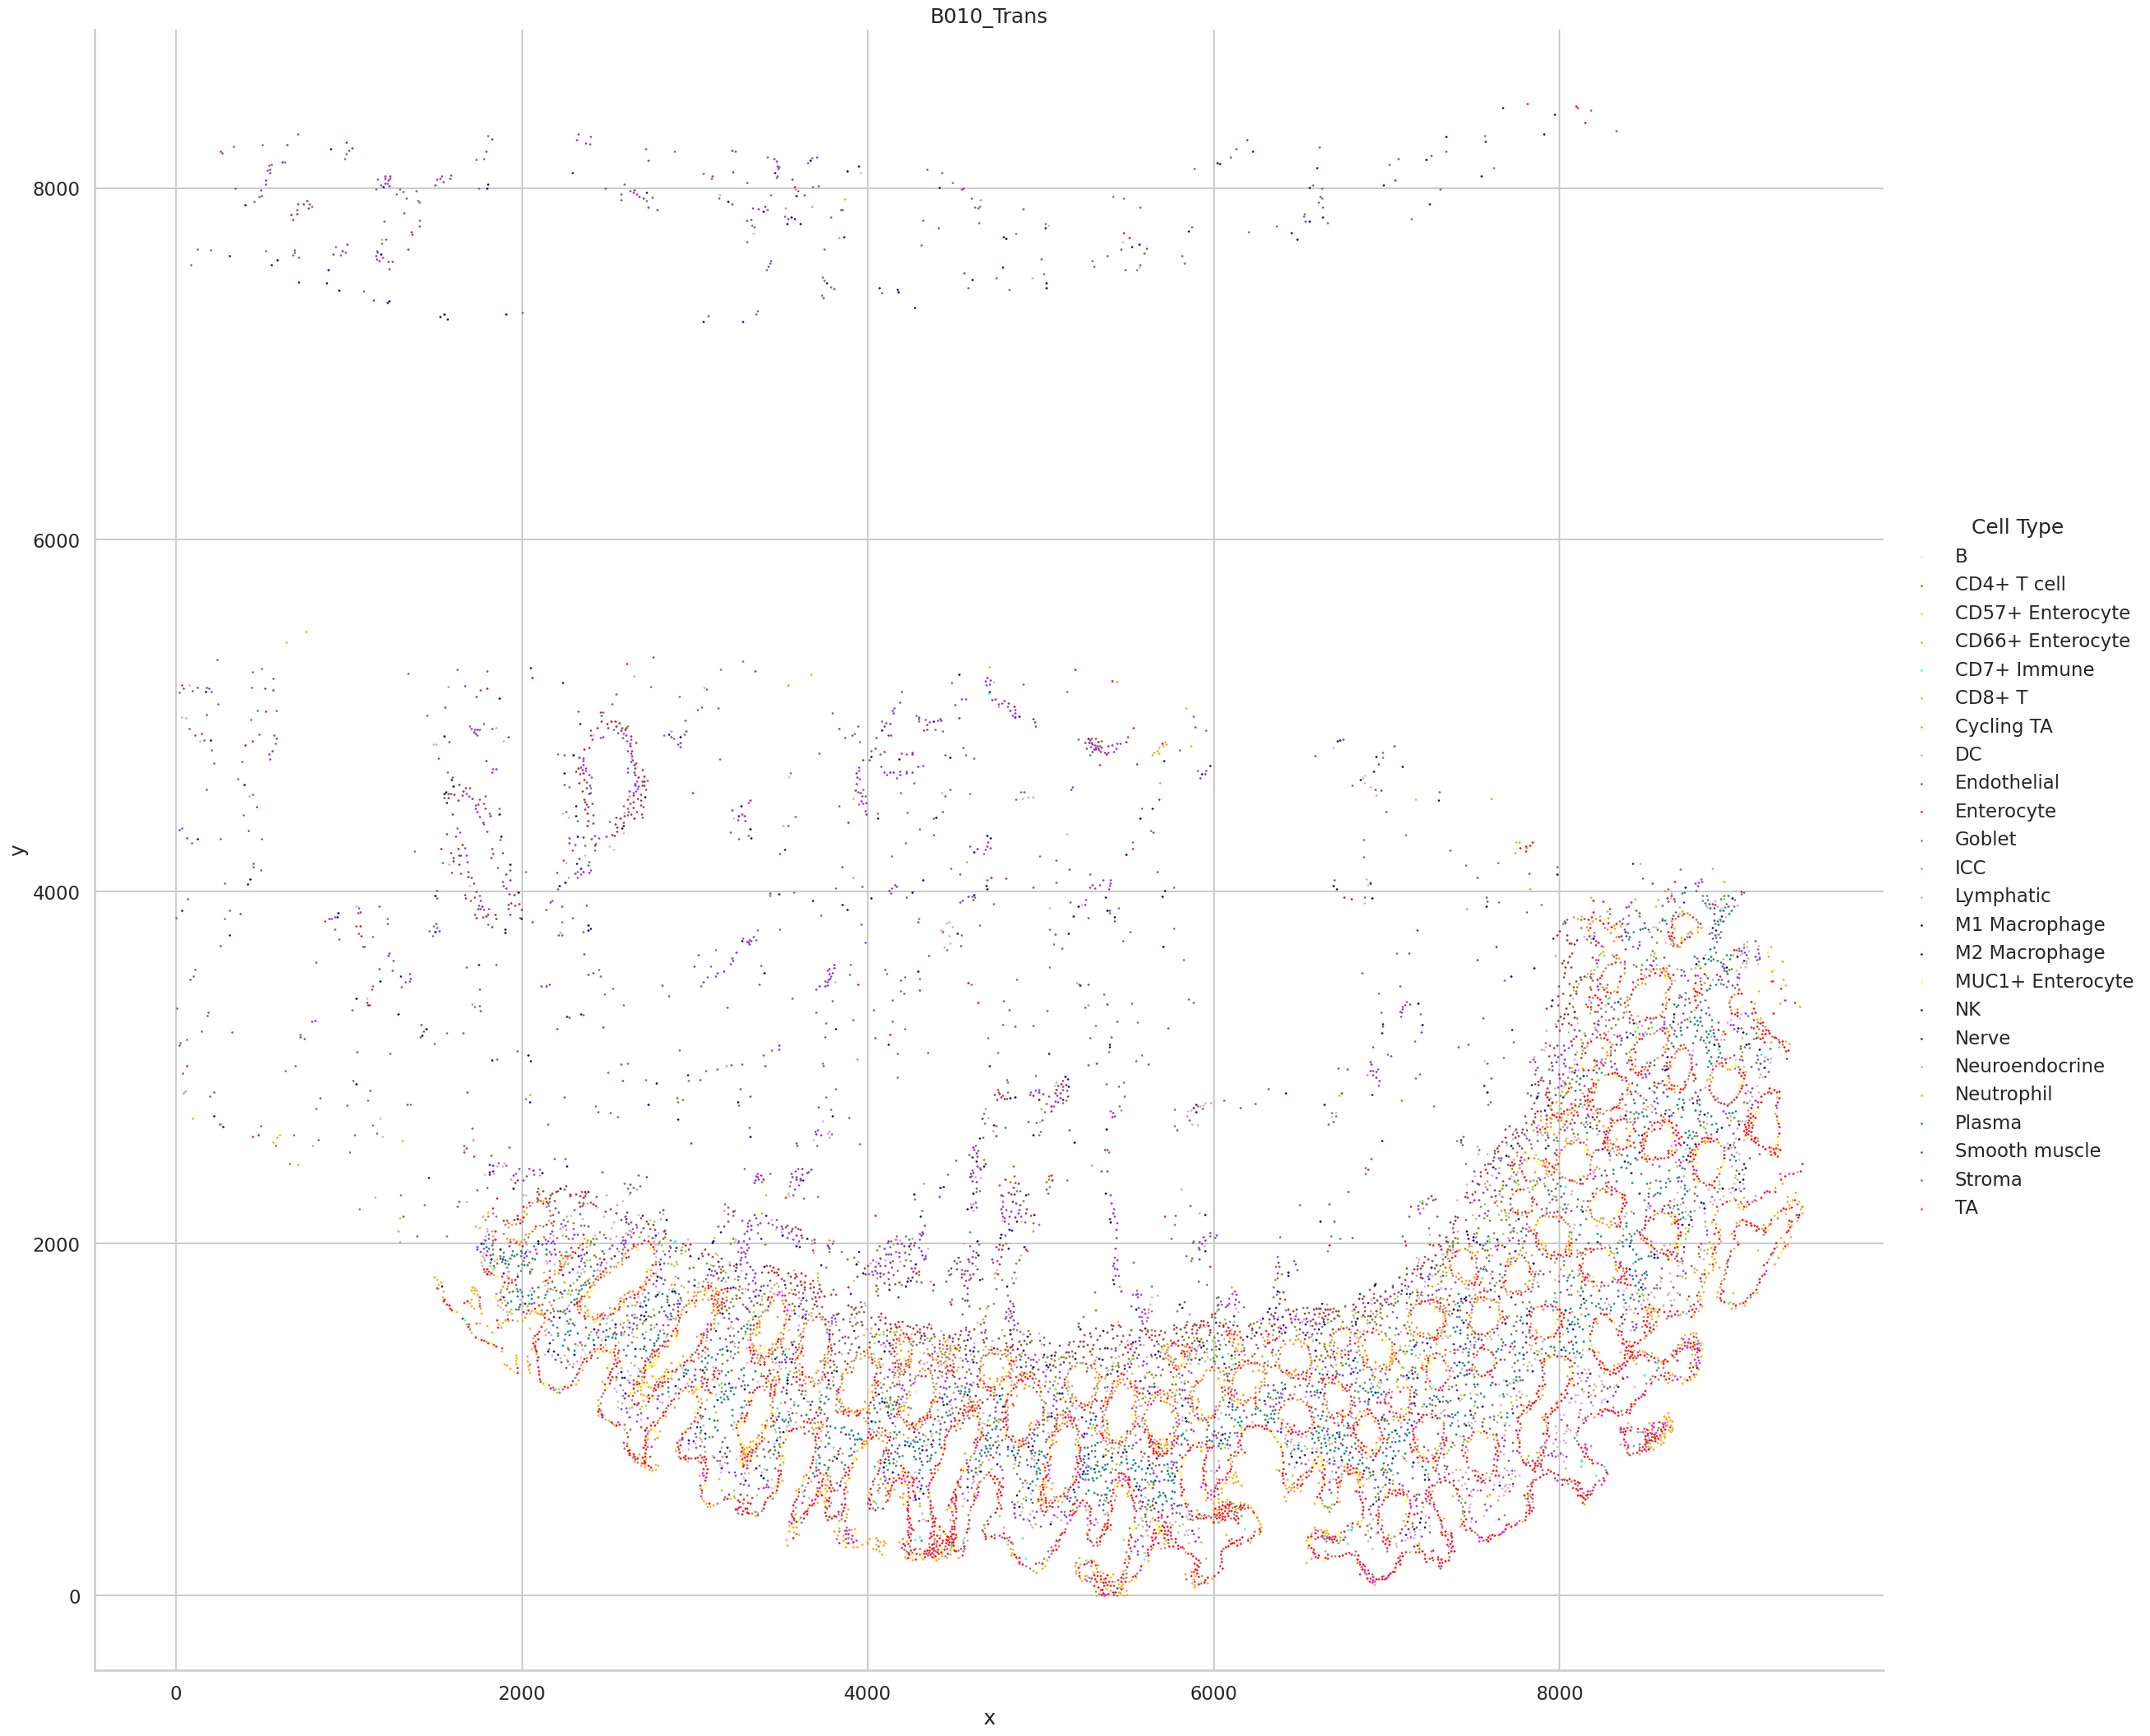

In [25]:
#Use this function to look at the tissues at the right scale and in higher resolution
catplot(df = df_HuBMAP.loc[df_HuBMAP['unique_region']=='B010_Trans'], hue = 'Cell Type', exp='unique_region', X='x', Y='y',
        invert_y=False, size=3, legend=True, palette=dict_cell, figsize=5,
        style='white', exps=None, axis='on', scatter_kws={})

## Look at specific areas for analysis

There are many different ways to split the data, here we will just look at a few

In [26]:
#We have separated the intestine tissue into 3 major segments
df_HuBMAP['Tissue Segment'].unique()

array(['Mucosa', 'Subucosa', 'Muscle'], dtype=object)

In [27]:
#Separate just the mucosa to analyze
df_mucosa = df_HuBMAP.loc[df_HuBMAP['Tissue Segment']=='Mucosa']
df_mucosa

MUC2      SOX9      MUC1      CD31   Synapto     CD49f      CD15  \
0       -0.303994 -0.163727 -0.587608 -0.212903  0.164173 -0.664863  0.049305   
1       -0.301927 -0.491706 -0.500804 -0.243205 -0.142568 -0.664861 -0.182627   
2       -0.302206 -0.547234 -0.510705 -0.235309 -0.217185 -0.622758 -0.296486   
4       -0.294644 -0.615593 -0.570580 -0.247548 -0.042246 -0.642230 -0.299031   
5       -0.298609 -0.272162 -0.587607 -0.228376 -0.266695 -0.664864 -0.237499   
...           ...       ...       ...       ...       ...       ...       ...   
2603212  0.351916  0.693827 -0.081489 -0.240643  0.008875  0.143445  0.373710   
2603213  0.233642  0.171892  0.141842 -0.236145 -0.097772 -0.099283  0.626185   
2603214 -0.212237 -0.280904 -0.197833 -0.245638 -0.152563 -0.125035  0.430416   
2603215 -0.328666  0.607609 -0.180362 -0.247351 -0.143742 -0.169576  1.095596   
2603216  0.015179  1.656635 -0.250193 -0.243560 -0.084982  0.061781  1.300252   

             CHGA      CDX2     ITLN1  ...      Cell Type em  Cell subtype  \
0        0.003616 -0.377532 -0.450794  ...                NK        Immune   
1       -0.117573 -0.182754 -0.236199  ...                NK        Immune   
2       -0.091504 -0.268055 -0.355383  ...                NK        Immune   
4       -0.121458 -0.377533 -0.450797  ...                NK        Immune   
5       -0.121460 -0.168489 -0.430944  ...                NK        Immune   
...           ...       ...       ...  ...               ...           ...   
2603212 -0.097896  0.869830  0.579653  ...  CD66+ Enterocyte    Epithelial   
2603213 -0.105545  0.092076  0.682969  ...  CD66+ Enterocyte    Epithelial   
2603214 -0.105787 -0.038327 -0.173319  ...  CD66+ Enterocyte    Epithelial   
2603215 -0.113879  0.370160 -0.133272  ...  CD66+ Enterocyte    Epithelial   
2603216 -0.108526  1.245830 -0.063456  ...  CD66+ Enterocyte    Epithelial   

                    Neighborhood   Neigh_sub         Neighborhood_Ind  \
0              Mature Epithelial  Epithelial        Mature Epithelial   
1        Transit Amplifying Zone  Epithelial        Mature Epithelial   
2         Innate Immune Enriched      Immune   Innate Immune Enriched   
4                 Outer Follicle      Immune           Outer Follicle   
5                 Outer Follicle      Immune           Outer Follicle   
...                          ...         ...                      ...   
2603212  CD66+ Mature Epithelial  Epithelial  CD66+ Mature Epithelial   
2603213  CD66+ Mature Epithelial  Epithelial  CD66+ Mature Epithelial   
2603214      CD8+ T Enriched IEL      Immune      CD8+ T Enriched IEL   
2603215  Transit Amplifying Zone  Epithelial        Mature Epithelial   
2603216  CD66+ Mature Epithelial  Epithelial  CD66+ Mature Epithelial   

         NeighInd_sub                Community  Major Community  \
0          Epithelial     Plasma Cell Enriched           Immune   
1          Epithelial        Mature Epithelial       Epithelial   
2              Immune   Innate Immune Enriched           Immune   
4              Immune                 Follicle           Immune   
5              Immune                 Follicle           Immune   
...               ...                      ...              ...   
2603212    Epithelial     Secretory Epithelial       Epithelial   
2603213    Epithelial     Secretory Epithelial       Epithelial   
2603214        Immune        Mature Epithelial       Epithelial   
2603215    Epithelial  CD66+ Mature Epithelial       Epithelial   
2603216    Epithelial        Mature Epithelial       Epithelial   

         Tissue Segment  Tissue Unit  
0                Mucosa       Mucosa  
1                Mucosa       Mucosa  
2                Mucosa       Mucosa  
4                Mucosa       Mucosa  
5                Mucosa       Mucosa  
...                 ...          ...  
2603212          Mucosa       Mucosa  
2603213          Mucosa       Mucosa  
2603214          Mucosa       Mucosa  
2603215          Mucosa       M

In [28]:
#Function to look at distribution of cell types (grouping) by different categories
def area_plot(data, per_cat, grouping, cell_list,color_dict=None, norm=True, save_name=None, col_order=None, name_cat = 'Cell Type',fig_sizing=(8,4)):
    if col_order is None:
        col_order=list(data[grouping].unique())

    cell_list_1 = cell_list.copy()
    #Find Percentage of cell type
    test= data.copy()
    if norm==True:
        test1 = test.loc[test[per_cat].isin(cell_list_1)]
    else:
        test1 = test.copy()
    test1[per_cat] = test1[per_cat].astype('category')
    test_freq = test1.groupby(grouping).apply(lambda x: x[per_cat].value_counts(normalize = True,sort = False)*100)
    test_freq.columns = test_freq.columns.astype(str)

    ##### Can subset it here if I do not want normalized per the group
    test_freq.reset_index(inplace=True)
    cell_list_1.append(grouping)
    test_freq = test_freq[cell_list_1]
    melt_test = pd.melt(test_freq, id_vars=[grouping])#, value_vars=test_freq.columns)
    melt_test.rename(columns = {per_cat: name_cat, 'value':'percent'},  inplace = True)

    #Set up for plotting
    melt_test_piv = pd.pivot_table(melt_test, columns = [name_cat], index=[grouping], values=['percent'])
    melt_test_piv.columns = melt_test_piv.columns.droplevel(0)
    melt_test_piv.reset_index(inplace=True)
    melt_test_piv.set_index(grouping, inplace=True)
    melt_test_piv = melt_test_piv.reindex(col_order)
    col_order2 = melt_test_piv.mean().sort_values(ascending=False).index.to_list()
    melt_test_piv= melt_test_piv[col_order2]

    #Get color dictionary
    if color_dict is None:
        cond_list = melt_test_piv.columns.to_list()
        color_list=list(pal_temp.values())
        color_dict = dict(zip(cond_list, color_list))

    #first subplot
    ax1 = melt_test_piv.plot.area(alpha = 0.8, linewidth=1, color=[color_dict.get(x) for x in melt_test_piv.columns], figsize =fig_sizing, rot=90)
    for line in ax1.lines:
        line.set_color('black')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_ylabel('percent')
    #ax1.spines['left'].set_position(('data', 1.0))
    #ax1.set_xticks(np.arange(1,melt_test.day.max()+1,1))
    #ax1.set_ylim([0, int(ceil(max(max(melt_test_piv.sum(axis=1)), max(tm_piv.sum(axis=1)))))])

    lgd2 = ax1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
    if save_name:
        plt.savefig(save_path+save_name+'_t_piv_celltype_percent.png', format='png', dpi=300, transparent=True, bbox_inches='tight')
    return melt_test_piv

There are many areas we imaged of the intestine from every donor

In [29]:
  #What other areas are imaged from all donors?
  df_mucosa['Tissue_location'].unique()

array(['Ascending', 'Descending', 'Duodenum', 'Ileum', 'Mid-jejunum',
       'Proximal Jejunum', 'Descending - Sigmoid', 'Transverse'],
      dtype=object)

We can also separate cell types into different major types to look in greater detail within each subtype. This can help with visualization and not having too many categories

In [30]:
#We separate cell types into one of 3 buckets
df_mucosa['Cell subtype'].unique()

array(['Immune', 'Epithelial', 'Stromal'], dtype=object)

Let's plot the epithelial percentage of cells just from the mucosa and in just the small intestine regions that we collected

<ipython-input-28-795b96f4ea37>:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_freq = test1.groupby(grouping).apply(lambda x: x[per_cat].value_counts(normalize = True,sort = False)*100)


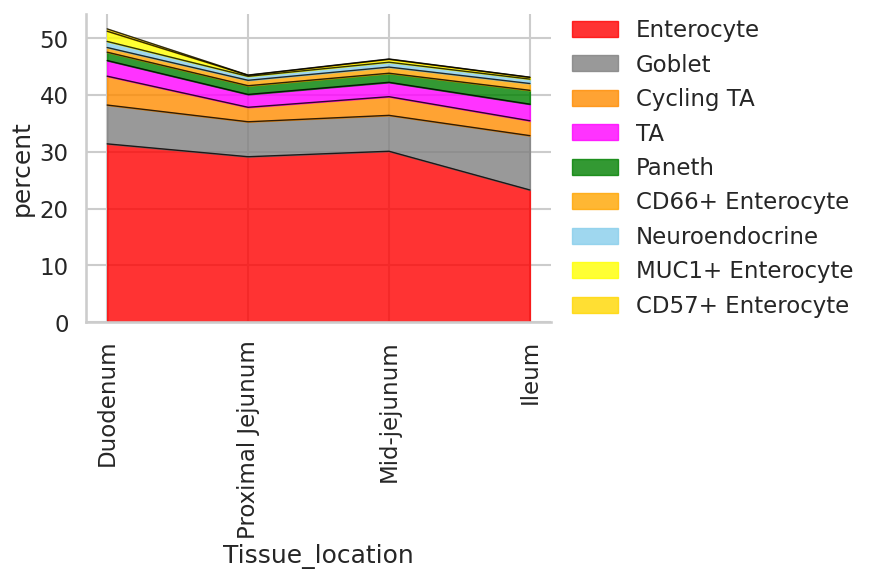

In [31]:
#Use area plot function to plot the subsetted dataframe

cell_list = list(df_mucosa.loc[df_mucosa['Cell subtype']=='Epithelial']['Cell Type'].unique())

col_order_list = [ 'Duodenum', 'Proximal Jejunum', 'Mid-jejunum','Ileum']#,'Ascending','Transverse','Descending', 'Descending - Sigmoid']

out_per = area_plot(data = df_mucosa, per_cat = 'Cell Type', grouping = 'Tissue_location', color_dict = dict_cell,\
          cell_list=cell_list, fig_sizing=(6,4), norm=False, col_order=col_order_list, save_name=None)

# Assignment

*Here is where your assignment starts. Please complete each problem and have the output saved when you upload this to your GitHub for turning it in.*

Problem #1 Subset the dataframe based on just the columns that were used for clustering and return the columns as an output (10% of points)

In [32]:
# Create a subset of the data frame with columns used for clustering (MUC2 through CD161)
subset_df_HuBMAP = df_HuBMAP.iloc[:,0:47]
# Return columns as an output
subset_df_HuBMAP

MUC2      SOX9      MUC1      CD31   Synapto     CD49f      CD15  \
0       -0.303994 -0.163727 -0.587608 -0.212903  0.164173 -0.664863  0.049305   
1       -0.301927 -0.491706 -0.500804 -0.243205 -0.142568 -0.664861 -0.182627   
2       -0.302206 -0.547234 -0.510705 -0.235309 -0.217185 -0.622758 -0.296486   
3       -0.304219 -0.613068 -0.584499 -0.243757 -0.266696 -0.658449 -0.299027   
4       -0.294644 -0.615593 -0.570580 -0.247548 -0.042246 -0.642230 -0.299031   
...           ...       ...       ...       ...       ...       ...       ...   
2603212  0.351916  0.693827 -0.081489 -0.240643  0.008875  0.143445  0.373710   
2603213  0.233642  0.171892  0.141842 -0.236145 -0.097772 -0.099283  0.626185   
2603214 -0.212237 -0.280904 -0.197833 -0.245638 -0.152563 -0.125035  0.430416   
2603215 -0.328666  0.607609 -0.180362 -0.247351 -0.143742 -0.169576  1.095596   
2603216  0.015179  1.656635 -0.250193 -0.243560 -0.084982  0.061781  1.300252   

             CHGA      CDX2     ITLN1  ...     CD117      CD19  Podoplanin  \
0        0.003616 -0.377532 -0.450794  ... -0.229013 -0.136007   -0.126372   
1       -0.117573 -0.182754 -0.236199  ... -0.229013 -0.160003   -0.272051   
2       -0.091504 -0.268055 -0.355383  ...  3.052579 -0.172104   -0.207255   
3       -0.121460 -0.345381 -0.450792  ...  0.774255 -0.176094   -0.270622   
4       -0.121458 -0.377533 -0.450797  ... -0.229013 -0.106623   -0.320673   
...           ...       ...       ...  ...       ...       ...         ...   
2603212 -0.097896  0.869830  0.579653  ... -0.126636 -0.074099   -0.140763   
2603213 -0.105545  0.092076  0.682969  ... -0.125775 -0.115161   -0.168008   
2603214 -0.105787 -0.038327 -0.173319  ... -0.143202 -0.117411   -0.168631   
2603215 -0.113879  0.370160 -0.133272  ... -0.149992 -0.117493   -0.173467   
2603216 -0.108526  1.245830 -0.063456  ... -0.134981 -0.073034   -0.145854   

             CD45      CD56      CD69      Ki67     CD49a     CD163     CD161  
0       -0.226603 -0.282104 -0.337309 -0.328652 -0.736535 -0.304606 -0.188373  
1       -0.551045  0.063713 -0.381561 -0.311211 -0.736535 -0.324616 -0.181808  
2       -0.289779 -0.287262 -0.317390 -0.225915 -0.671212 -0.291291 -0.190268  
3       -0.490348 -0.296769 -0.340400 -0.275875 -0.733125 -0.329447 -0.201727  
4       -0.551044  0.062078 -0.384764 -0.323847 -0.700788 -0.329448 -0.201727  
...           ...       ...       ...       ...       ...       ...       ...  
2603212 -0.355461 -0.266013 -0.073814 -0.168740 -0.482546 -0.169567 -0.059030  
2603213  0.659450 -0.276592  0.665741 -0.198040 -0.382311 -0.185245  0.030336  
2603214 -0.422898 -0.283102 -0.168023 -0.209282 -0.590715 -0.175264 -0.098719  
2603215 -0.415027 -0.281168 -0.173832 -0.208465 -0.596476 -0.187138 -0.104061  
2603216 -0.385598 -0.282565 -0.138440 -0.170928 -0.519500 -0.180098 -0.082352  

[2603217 rows x 47 columns]

Problem #2 Create a plot that shows the different neighborhood percentages averaged across the different regions of the intestine (10% of points)

<Figure size 3000x1800 with 0 Axes>

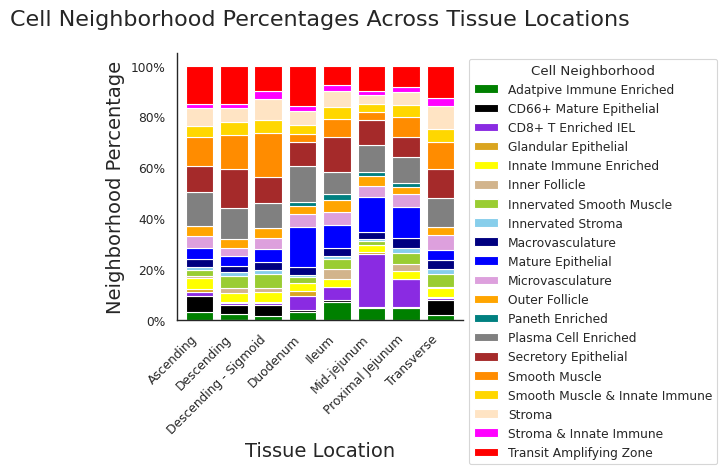

In [35]:
# Plot showing different neighborhood percentages averaged across different regions of the intestine
# Use pivot table

# Create pivot table
pivot_neighborhood = df_HuBMAP.pivot_table(index='Tissue_location', columns = 'Neighborhood', aggfunc ='size', fill_value=0)
pivot_neighborhood_percent = pivot_neighborhood.div(pivot_neighborhood.sum(axis=1),axis=0)*100

# Create dictionary of neighborhood colors and generate colors for plot
color_list = [
    'blue', 'red', 'yellow', 'magenta', 'orange', 'green', 'brown', 'black',
    'gray', 'skyblue', 'gold', 'plum', 'yellowgreen', 'tan', 'navy', 'bisque',
    'goldenrod', 'blueviolet', 'darkorange', 'teal', 'olive', 'dimgray',
    'indigo', 'lightcoral', 'cyan', 'ivory', 'beige', 'darkblue', 'lightcyan',
    'royalblue']
neighborhood_list = list(df_HuBMAP['Neighborhood'].unique())
dict_neighborhood = dict(zip(neighborhood_list, color_list))
colors = [dict_neighborhood[neighborhood_type] for neighborhood_type in pivot_neighborhood_percent.columns]

# Set stype
sns.set_style("white")
sns.set_context("paper")

# Create higher DPI (dots per inch)
plt.figure(figsize=(10, 6), dpi=300)

# Create bar chart
ax = pivot_neighborhood_percent.plot(kind='bar', stacked=True, color=colors, width=0.8)

# Set title and labels
plt.title("Cell Neighborhood Percentages Across Tissue Locations", fontsize=16, pad=20)
plt.xlabel("Tissue Location", fontsize=14)
plt.ylabel("Neighborhood Percentage", fontsize=14)

# Make y-axis percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust legend with custom color list
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, title="Cell Neighborhood", bbox_to_anchor=(1.0, 1.0), loc='upper left')

# Remove top and right spines
sns.despine()

# Tight and well-spaced layoyt
plt.tight_layout()

# Display plot
plt.show()


Problem #3 Plot the correlation of donor age and the percentage of Endothelial cells (10% of points)

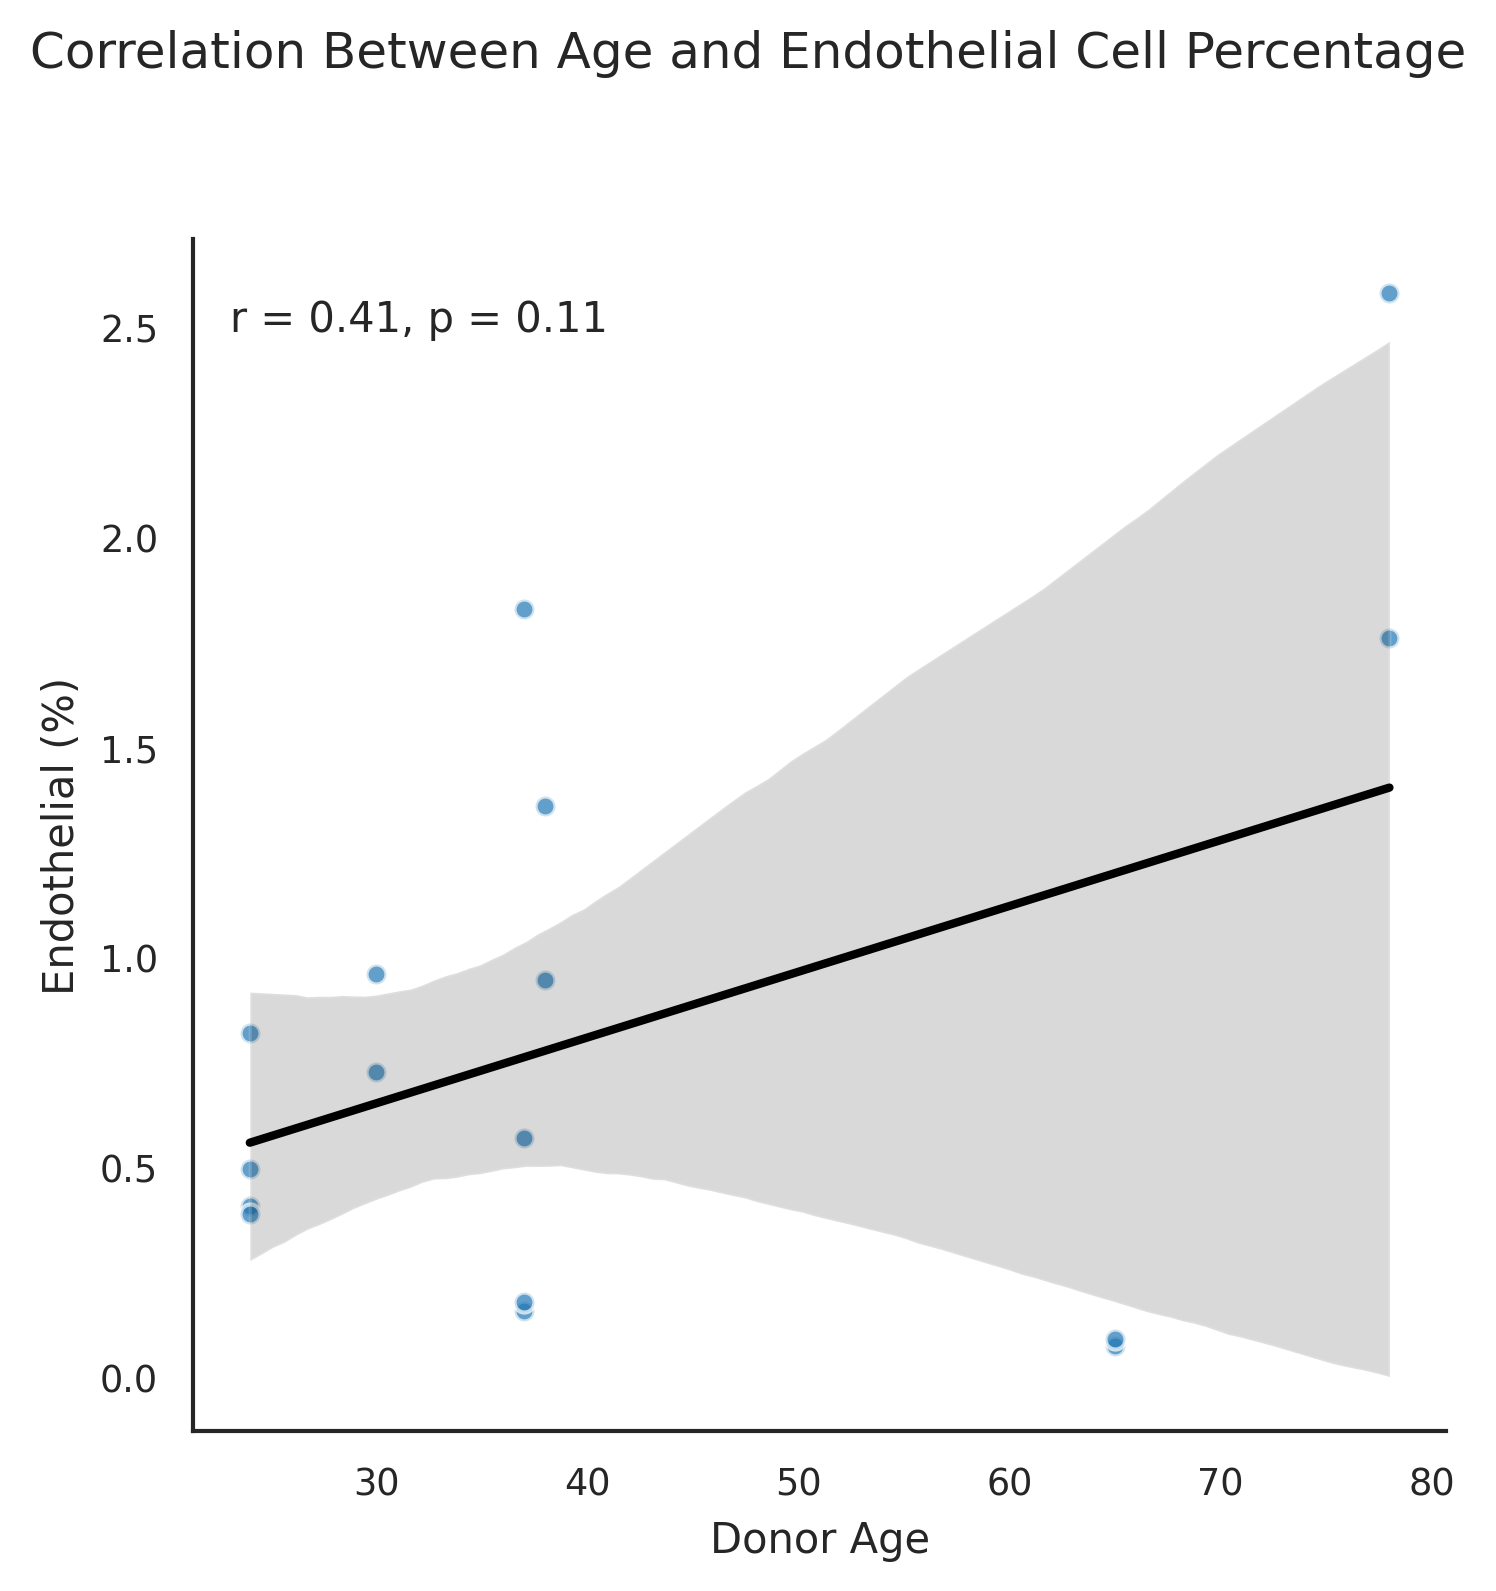

In [36]:
# Plot correlation of donor age and the percentage of endothelial cells

# Filter for endothelial cells
endothelial_cells = df_merged[df_merged['Cell Type'] == 'Endothelial']

# Calculate percentages by grouping endothelial cells by tissue and cell type
percentage_endo = M1_cells.groupby(['tissue', 'Cell Type','donor'])['MUC2'].count() / df_HuBMAP.groupby(['tissue','donor'])['MUC2'].count() * 100
percentage_endo = percentage_endo.reset_index(name='Percentage')

df_meta_cell = percentage_endo.merge(df_metadataT, on='donor', how='left')

# Convert age to numeric
df_meta_cell['donor age'] = pd.to_numeric(df_meta_cell['donor age'], errors='coerce')

# Set type
sns.set_style("white")
sns.set_context("paper")

# Create the lmplot with improved aesthetics
g = sns.lmplot(
    x='donor age',
    y='Percentage',
    data=df_meta_cell,
    height=5,
    aspect=1,
    scatter_kws={'alpha':0.7, 'edgecolor':'white'},  # softer points with white edges
    line_kws={'color':'black', 'lw':2}               # emphasize the regression line
)

# Define a function to annotate the plot with correlation coefficient and p-value
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['donor age'], data['Percentage'])
    ax = plt.gca()
    # Position annotation in the top-left corner inside the axes
    ax.text(0.03, 0.95, f'r = {r:.2f}, p = {p:.2g}',
            transform=ax.transAxes,
            fontsize=10,
            verticalalignment='top')

# Apply the annotate function
g.map_dataframe(annotate)

# Customize the plot labels and fonts
g.set_axis_labels('Donor Age', 'Endothelial (%)', fontsize=10)
g.set(xlim=(None, None), ylim=(None, None))  # Optionally set axis limits if needed

# Optionally add a title
g.fig.suptitle("Correlation Between Age and Endothelial Cell Percentage", fontsize=12, y=1.05)

# Increase figure DPI for better quality
g.fig.set_dpi(300)

# Remove top and right spines for a cleaner look
sns.despine()

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

Problem #4 Plot the tissue regions in spatial coordinates from each donor from the Duodenum colored by Neighborhood (10% of points)

B005_Duodenum


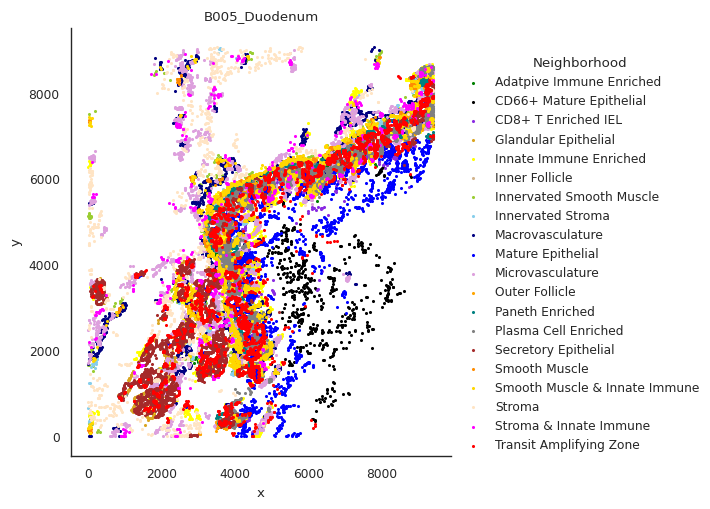

B004_Duodenum


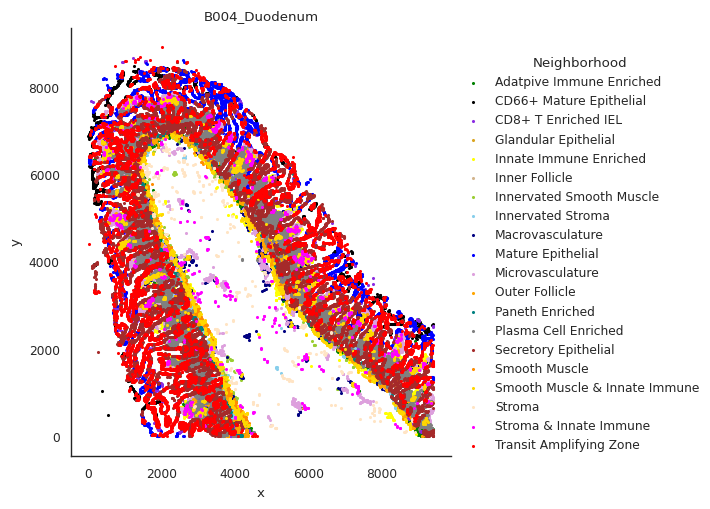

B006_Duodenum


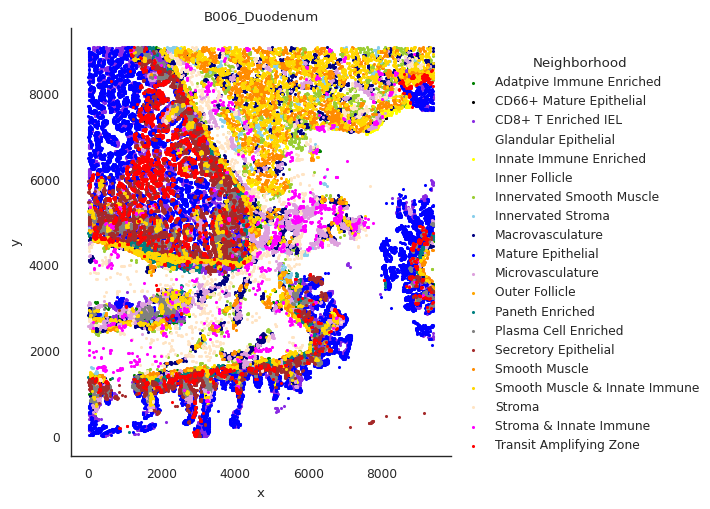

B009_Duodenum


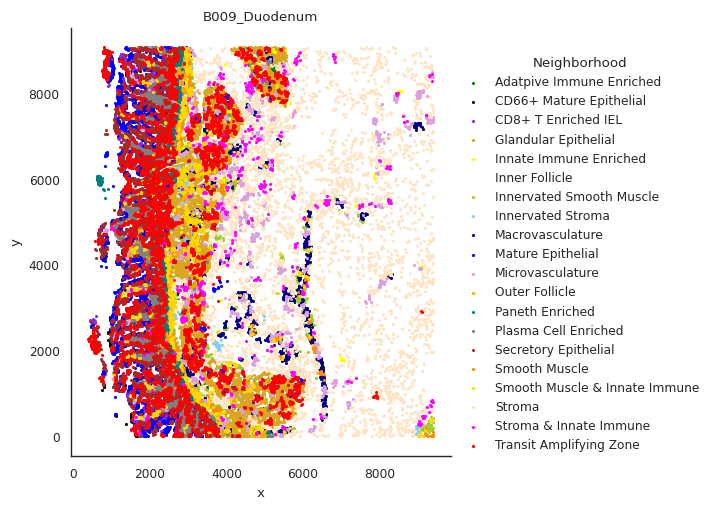

B011_Duodenum


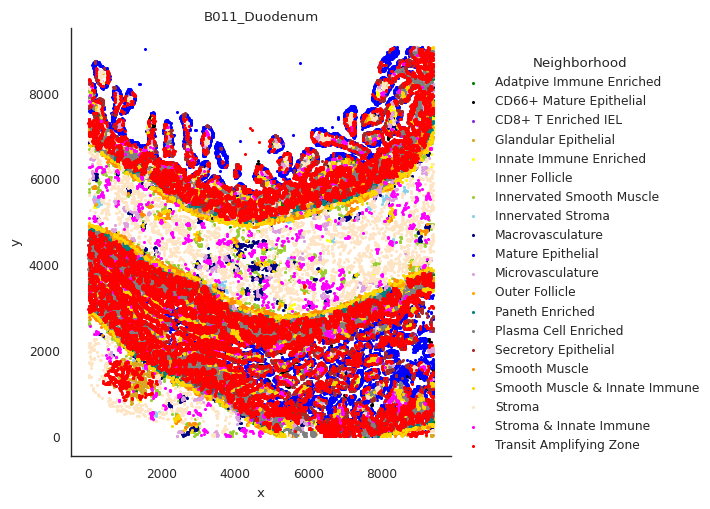

B012_Duodenum


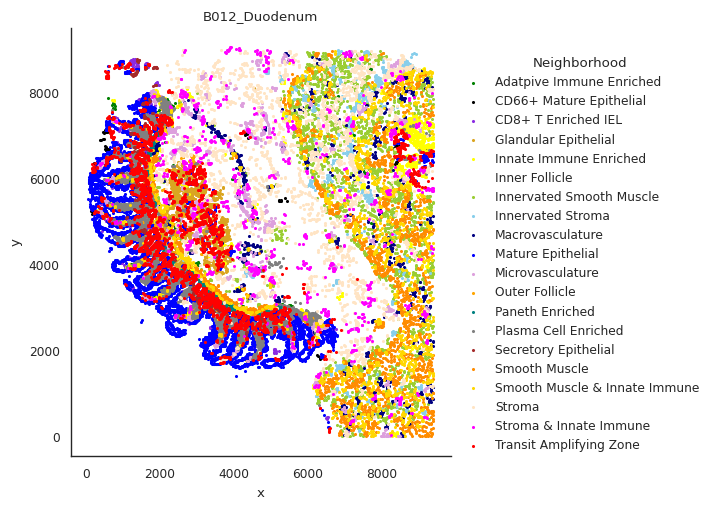

B010_Duodenum


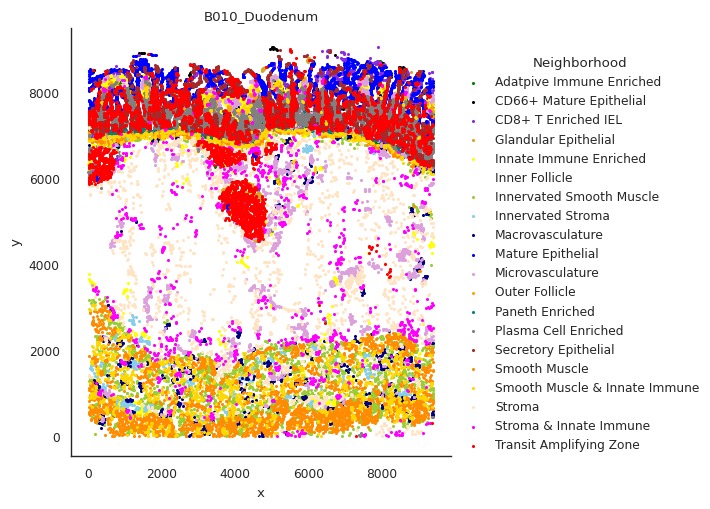

B008_Duodenum


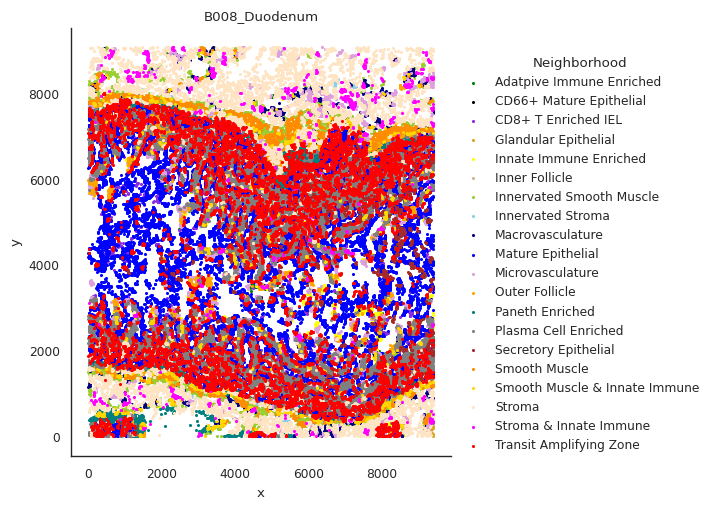

In [37]:
#Use the faster function for a quick overview of the tissues
catplot2(df = df_HuBMAP.loc[df_HuBMAP['Tissue_location']=='Duodenum'], hue = 'Neighborhood', exp='unique_region', X='x', Y='y',
        invert_y=False, size=6, legend=True, palette=dict_neighborhood, figsize=5,
        style='white', exps=None, axis='on', scatter_kws={})

Problem #5 Plot the percentage of Immune cells in the Submucosa of just the four regions from the colon (10% of points)

<ipython-input-38-ad7eb85b333b>:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_freq = test1.groupby(grouping).apply(lambda x: x[per_cat].value_counts(normalize = True,sort = False)*100)


(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 [Text(-0.5, 0, ''),
  Text(0.0, 0, 'Ascending'),
  Text(0.5, 0, ''),
  Text(1.0, 0, 'Descending'),
  Text(1.5, 0, ''),
  Text(2.0, 0, 'Descending - Sigmoid'),
  Text(2.5, 0, ''),
  Text(3.0, 0, 'Transverse'),
  Text(3.5, 0, '')])

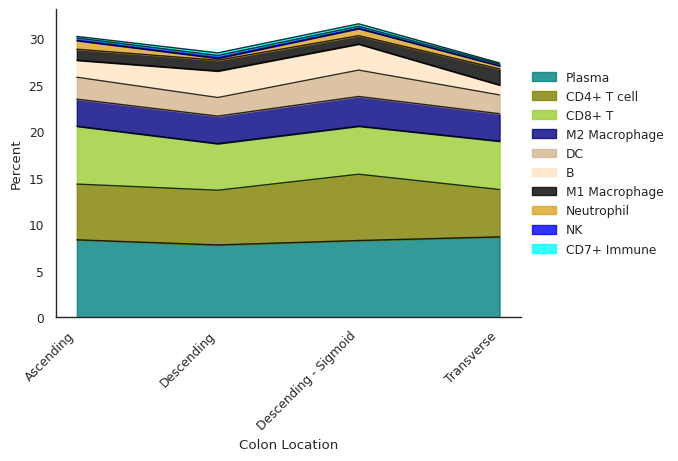

In [38]:
# Separate tissue into 3 segments
df_HuBMAP['Tissue Segment'].unique()

# Separate just submucosa
df_submucosa = df_HuBMAP.loc[df_HuBMAP['Tissue Segment']=='Subucosa']
df_submucosa

# Area plot to look at different categories of immune cells in the summucosa
def area_plot(data, per_cat, grouping, cell_list,color_dict=None, norm=True, save_name=None, col_order=None, name_cat = 'Cell Type',fig_sizing=(8,4)):
    if col_order is None:
        col_order=list(data[grouping].unique())

    cell_list_1 = cell_list.copy()
    #Find Percentage of cell type
    test= data.copy()
    if norm==True:
        test1 = test.loc[test[per_cat].isin(cell_list_1)]
    else:
        test1 = test.copy()
    test1[per_cat] = test1[per_cat].astype('category')
    test_freq = test1.groupby(grouping).apply(lambda x: x[per_cat].value_counts(normalize = True,sort = False)*100)
    test_freq.columns = test_freq.columns.astype(str)

    ##### Can subset it here if I do not want normalized per the group
    test_freq.reset_index(inplace=True)
    cell_list_1.append(grouping)
    test_freq = test_freq[cell_list_1]
    melt_test = pd.melt(test_freq, id_vars=[grouping])#, value_vars=test_freq.columns)
    melt_test.rename(columns = {per_cat: name_cat, 'value':'percent'},  inplace = True)

    #Set up for plotting
    melt_test_piv = pd.pivot_table(melt_test, columns = [name_cat], index=[grouping], values=['percent'])
    melt_test_piv.columns = melt_test_piv.columns.droplevel(0)
    melt_test_piv.reset_index(inplace=True)
    melt_test_piv.set_index(grouping, inplace=True)
    melt_test_piv = melt_test_piv.reindex(col_order)
    col_order2 = melt_test_piv.mean().sort_values(ascending=False).index.to_list()
    melt_test_piv= melt_test_piv[col_order2]

    #Get color dictionary
    if color_dict is None:
        cond_list = melt_test_piv.columns.to_list()
        color_list=list(pal_temp.values())
        color_dict = dict(zip(cond_list, color_list))

    #first subplot
    ax1 = melt_test_piv.plot.area(alpha = 0.8, linewidth=1, color=[color_dict.get(x) for x in melt_test_piv.columns], figsize =fig_sizing, rot=90)
    for line in ax1.lines:
        line.set_color('black')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.set_ylabel('Percent')
    ax1.set_xlabel('Colon Location')
    #ax1.spines['left'].set_position(('data', 1.0))
    #ax1.set_xticks(np.arange(1,melt_test.day.max()+1,1))
    #ax1.set_ylim([0, int(ceil(max(max(melt_test_piv.sum(axis=1)), max(tm_piv.sum(axis=1)))))])

    lgd2 = ax1.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, frameon=False)
    if save_name:
        plt.savefig(save_path+save_name+'_t_piv_celltype_percent.png', format='png', dpi=300, transparent=True, bbox_inches='tight')
    return melt_test_piv

# Areas imaged
df_submucosa['Tissue_location'].unique()

# 3 Cell Types
df_mucosa['Cell subtype'].unique()

# Plot
cell_list = list(df_mucosa.loc[df_mucosa['Cell subtype']=='Immune']['Cell Type'].unique())

col_order_list = [ 'Ascending', 'Descending', 'Descending - Sigmoid','Transverse']

out_per = area_plot(data = df_mucosa, per_cat = 'Cell Type', grouping = 'Tissue_location', color_dict = dict_cell,\
          cell_list=cell_list, fig_sizing=(6,4), norm=False, col_order=col_order_list, save_name=None)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

Problem 6 Create 3 different visualizations of the CODEX data from different views/slices of the data and describe the findings you see (50% of points)

1. Percentage of B-cells in those with a history of diabetes: This visualization shows that those without a history of diabetes seem to have a larger spread in the percent of immune cells and higher percentages. However, the percentages for both groups are very low.

<Axes: xlabel='History of diabetes', ylabel='Percentage'>

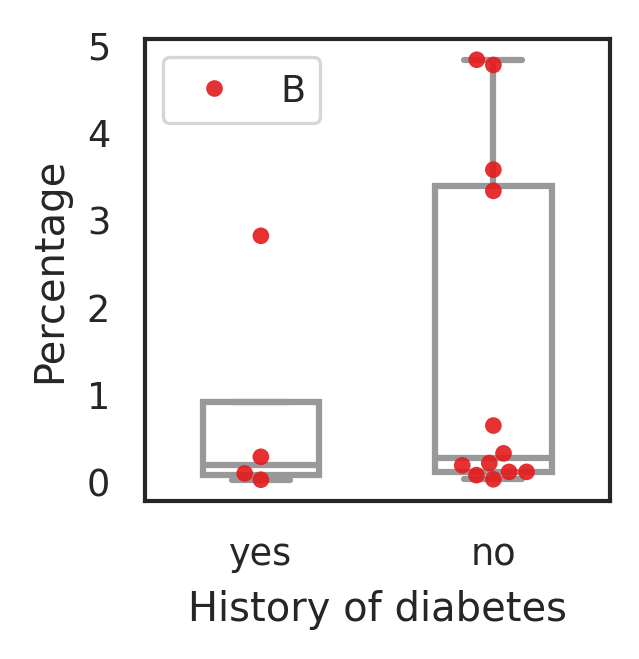

In [39]:
# B cells and history of diabetes

# Filter for B Cells
b_cells =df_merged[df_merged['Cell Type'] == 'B']

# Calculate percentages by grouping by cell type, tissue, donor, history of diabetes
percentage_b_cells = b_cells.groupby(['tissue', 'Cell Type', 'donor', 'History of diabetes'])['MUC2'].count() / df_merged.groupby(['tissue', 'donor','History of diabetes'])['MUC2'].count() * 100
percentage_b_cells = percentage_b_cells.reset_index(name='Percentage')

# Set style and context
sns.set_style("white")
sns.set_context("paper")

# Higher DPI for clarity
plt.figure(figsize=(2, 2), dpi=300)

# Create Swarm plot
sns.swarmplot(
    data=percentage_b_cells,
    x = 'History of diabetes',
    y = 'Percentage',
    palette = 'Set1',
    marker = 'o',
    hue = 'Cell Type',
    size = 4,
    alpha = 0.9
)

# Overlay box plot
sns.boxplot(
    data=percentage_b_cells,
    x='History of diabetes',
    y='Percentage',
    color='white',
    width=0.5,
    linewidth=1.5,
    showfliers=False
)

2. Cell type pie plots in small intestine and colon: This visualization shows that the two regions, the colon and small intestine, have slightly different distributions in cell type. If looking at immune implications, the small intestine has more immune cells compared to the colon.

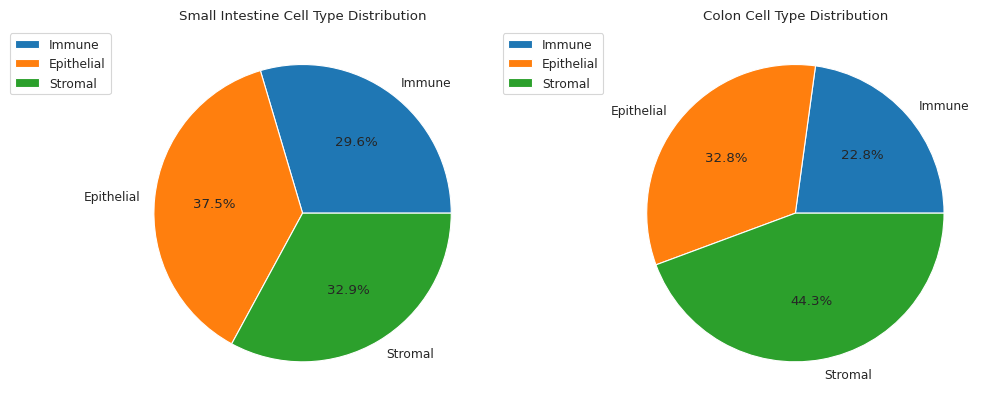

In [40]:
# Pie charts of cell type in the small intestine and colon
df_HuBMAP['Cell subtype'].unique()

# Filter for cell type
df_immune = df_HuBMAP.loc[df_HuBMAP['Cell subtype']=='Immune']
df_epithelial = df_HuBMAP.loc[df_HuBMAP['Cell subtype']=='Epithelial']
df_stromal = df_HuBMAP.loc[df_HuBMAP['Cell subtype']=='Stromal']

# Function to calculate mean percentages for a tissue type
def calculate_mean_percentages(tissue_type):
    # Filter data for the specified tissue type
    filtered_data = df_HuBMAP[df_HuBMAP['tissue'] == tissue_type]

    # Calculate percentage for each subtype
    percentage_immune = df_immune[df_immune['tissue'] == tissue_type].groupby(['Cell Type'])['MUC2'].count() / filtered_data.groupby(['donor'])['MUC2'].count().sum() * 100
    percentage_epithelial = df_epithelial[df_epithelial['tissue'] == tissue_type].groupby(['Cell Type'])['MUC2'].count() / filtered_data.groupby(['donor'])['MUC2'].count().sum() * 100
    percentage_stromal = df_stromal[df_stromal['tissue'] == tissue_type].groupby(['Cell Type'])['MUC2'].count() / filtered_data.groupby(['donor'])['MUC2'].count().sum() * 100

    # Calculate the mean percentage of each subtype
    immune_mean = percentage_immune.sum()
    epithelial_mean = percentage_epithelial.sum()
    stromal_mean = percentage_stromal.sum()

    # Create DataFrame with mean values
    data = {'category': ['Immune', 'Epithelial', 'Stromal'], 'value': [immune_mean, epithelial_mean, stromal_mean]}
    df = pd.DataFrame(data)
    return df

# Calculate mean percentages for small intestine
df_small_intestine = calculate_mean_percentages('SB')

# Calculate mean percentages for colon
df_colon = calculate_mean_percentages('CL')

# Create pie charts
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Small intestine pie chart
df_small_intestine.plot.pie(y='value', labels=df_small_intestine['category'], autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Small Intestine Cell Type Distribution')
axes[0].set_ylabel('')  # Remove the default ylabel
axes[0].legend(bbox_to_anchor=(0, 1))  # Adjust legend position

# Colon pie chart
df_colon.plot.pie(y='value', labels=df_colon['category'], autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Colon Cell Type Distribution')
axes[1].set_ylabel('')  # Remove the default ylabel
axes[1].legend(bbox_to_anchor=(0, 1))  # Adjust legend position

# Adjust key
plt.tight_layout()

plt.tight_layout()
plt.show()

3. Cell type percentages averaged across different communities within the tissue: This visualization confirms why some of the communities are categorized as they are, like stromal and mature or secretory epithelial. It also reveals that the follicle has the most amount of immune cells compared to the other communities.

<Figure size 3000x1800 with 0 Axes>

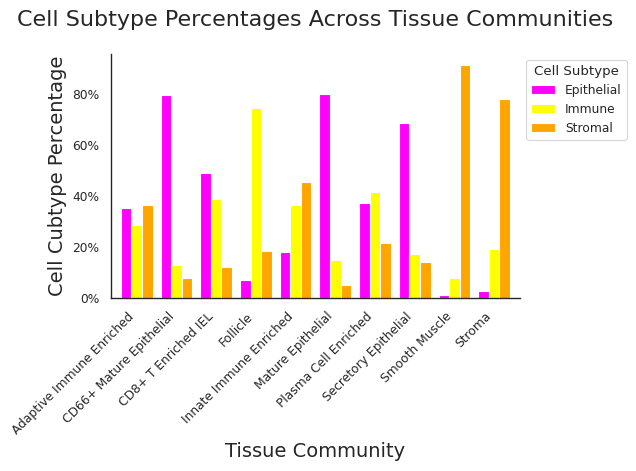

In [41]:
# Plot showing different cell type percentages averaged across different communities in the tissue
# neighborhood = subtype, location = community

# Use pivot table
# Create pivot table
pivot_subtype = df_HuBMAP.pivot_table(index='Community', columns = 'Cell subtype', aggfunc ='size', fill_value=0)
pivot_subtype_percent = pivot_subtype.div(pivot_subtype.sum(axis=1),axis=0)*100

# Set stype
sns.set_style("white")
sns.set_context("paper")

# Create dictionary of neighborhood colors and generate colors for plot
color_list = [
    'yellow', 'magenta', 'orange']
subtype_list = list(df_HuBMAP['Cell subtype'].unique())
dict_subtype = dict(zip(subtype_list, color_list))
colors = [dict_subtype[subtype_type] for subtype_type in pivot_subtype_percent.columns]

# Create higher DPI (dots per inch)
plt.figure(figsize=(10, 6), dpi=300)

# Create bar chart
ax = pivot_subtype_percent.plot(kind='bar', stacked=False, color=colors, width=0.8)

# Set title and labels
plt.title("Cell Subtype Percentages Across Tissue Communities", fontsize=16, pad=20)
plt.xlabel("Tissue Community", fontsize=14)
plt.ylabel("Cell Cubtype Percentage", fontsize=14)

# Make y-axis percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust legend with custom color list
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, labels, title="Cell Subtype", bbox_to_anchor=(1.0, 1.0), loc='upper left')

# Remove top and right spines
sns.despine()

# Tight and well-spaced layoyt
plt.tight_layout()

# Display plot
plt.show()